In [2]:
import numpy as np
print(np.version.version)
from numpy import loadtxt
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import glob
from numpy import diff
import pandas as pn
import math
import scipy.constants as sc
import pickle
import copy
from scipy import interpolate
from matplotlib import rcParams, cycler, cm, rc
plotall = True
overview_plot = True
from pylab import meshgrid,cm,imshow,contour,clabel,colorbar,axis,title,show,pcolor
import pandas as pd
import os
import matplotlib.ticker
from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from numpy.polynomial import Polynomial
from scipy.interpolate import griddata
import matplotlib.cm as cm
import matplotlib as mpl
import numpy.ma as ma

1.24.3


In [3]:
%run XRD_Functions.ipynb

## Closest Element ##

In [4]:
def closest_element(array,value):
    element = min(array, key=lambda x:abs(x-value))
    closest_element = np.where(array == element)[0][0]
    return closest_element

## Closest Element Range ##

In [5]:
def closest_element_index(array,value):
    array1 = np.sort(array)
    closest_element = min(array1, key=lambda x:abs(x-value))
    closest_element_index = np.where(array1 == closest_element)[0][0]
    closest_index_range = array1[closest_element_index-1 : closest_element_index+1]
    mylist = []
    for i in closest_index_range:
        closest_index_actual = np.where(array == i)[0]
        mylist = np.sort(np.append(mylist,closest_index_actual))
    return mylist

In [6]:
"---Folder Paths---"

folder_STO_103_plus = r"C:\Users\pblah\Data\XRD\FM332\Exfoliated\RSM\hkl\Analysed\STO 103+"
pathlist_STO_103_plus = folderpath(folder_STO_103_plus)

folder_SRO_103_plus = r"C:\Users\pblah\Data\XRD\FM332\Exfoliated\RSM\hkl\Analysed\SRO 103+"
pathlist_SRO_103_plus = folderpath(folder_SRO_103_plus)


folder_STO_103_minus = r"C:\Users\pblah\Data\XRD\FM332\Exfoliated\RSM\hkl\Analysed\STO 103-"
pathlist_STO_103_minus = folderpath(folder_STO_103_minus)


folder_SRO_103_minus = r"C:\Users\pblah\Data\XRD\FM332\Exfoliated\RSM\hkl\Analysed\SRO 103-"
pathlist_SRO_103_minus = folderpath(folder_SRO_103_minus)


print(pathlist_STO_103_plus)
print(pathlist_SRO_103_plus)
print(pathlist_STO_103_minus)
print(pathlist_SRO_103_minus)



['C:\\Users\\pblah\\Data\\XRD\\FM332\\Exfoliated\\RSM\\hkl\\Analysed\\STO 103+\\Take_2_STO_103+_hkl.txt']
['C:\\Users\\pblah\\Data\\XRD\\FM332\\Exfoliated\\RSM\\hkl\\Analysed\\SRO 103+\\Take_2_SRO_103+_hkl.txt']
['C:\\Users\\pblah\\Data\\XRD\\FM332\\Exfoliated\\RSM\\hkl\\Analysed\\STO 103-\\Take_2_STO_103-_hkl.txt']
['C:\\Users\\pblah\\Data\\XRD\\FM332\\Exfoliated\\RSM\\hkl\\Analysed\\SRO 103-\\Take_2_SRO_103-_hkl.txt']


## STO 103+ ##

i 0
data C:\Users\pblah\Data\XRD\FM332\Exfoliated\RSM\hkl\Analysed\STO 103+\Take_2_STO_103+_hkl.txt
57589
max count value 540763.6157068422
max count value index (array([152], dtype=int64), array([154], dtype=int64))
z_max (array([152], dtype=int64), array([154], dtype=int64))
y_max index 152
y_max [2.99997562]
x_max index (array([152], dtype=int64), array([154], dtype=int64))
x_max [1.00006564]
y_correction 2.4379652173944777e-05
x_correction -6.56432541805696e-05
CPU times: total: 5.11 s
Wall time: 5.77 s


<timed exec>:92: UserWarning: Log scale: values of z <= 0 have been masked
<timed exec>:92: UserWarning: linewidths is ignored by contourf


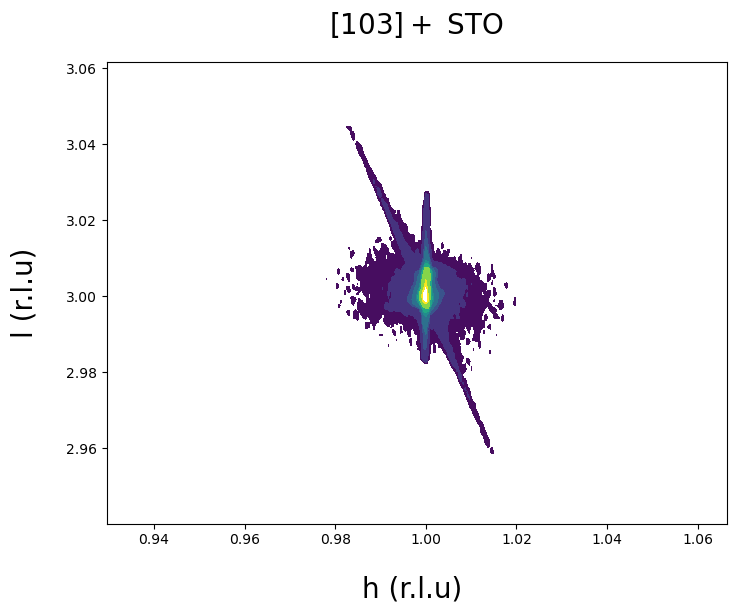

In [7]:
%%time

import sys
np.set_printoptions(threshold=1000) # can change to sys.maxsize, default is 1000

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
cm = plt.get_cmap('inferno', 30)




#npts = 200
ngridx = 300
ngridy = 300

for i,data in enumerate(pathlist_STO_103_plus):
    
    print("i",i)
    print("data",data)

    dataextracted = np.loadtxt(data,encoding="utf-8-sig", unpack = True)
    l = dataextracted[0]
    h = dataextracted[1]
    counts = dataextracted[2]
    
    l = np.ma.masked_invalid(l)
    h = np.ma.masked_invalid(h)
    
    print(len(h))
    

    
    x = np.linspace(0.929580673,1.066431362, ngridx)
    y = np.linspace(3.061808196,2.940177011, ngridy)
    xi_STO, yi_STO = np.meshgrid(x, y)
  
    zi_STO = griddata((h,l), counts, (xi_STO, yi_STO), method='linear')
    zi_STO = np.ma.masked_invalid(zi_STO)
    zi_array_STO = np.asarray(zi_STO)
    zi_array_one_STO = np.ndarray.flatten(zi_array_STO)
    
    print("max count value",np.nanmax(zi_STO))
    print("max count value index",np.where(zi_STO == np.nanmax(zi_STO)))
    z_max = np.where(zi_STO == np.nanmax(zi_STO))  # The linear interpolation of griddata is not perfect...Note: Say you get array[149],array[152]. This means it's the 152nd element of the xi_STO array. The xi-STO array goes over a range while yi_STO stays the same.
    print("z_max",z_max)
    y_max_index = z_max[0][0] # The yi_STO where we find the max count value, where yi-STO is kept contant and you sweep though a range of values for xi_STO. SO the xi_STO and yi_STO indexes are the same.
    print("y_max index",y_max_index)
    print('y_max',yi_STO[z_max])
    x_max_index = z_max
    print("x_max index",x_max_index)
    print('x_max',xi_STO[z_max])
  
    y_correction = (3-yi_STO[y_max_index])[0]
    x_correction = (1-xi_STO[x_max_index][0])
    print('y_correction',y_correction)
    print('x_correction',x_correction)
    
    
    ###### Showing what I explained in comment of z_max ######
    #x_max_index = z_max[0][0]
    #print("x_max index",x_max_index)
    #print("zi_STO with x_max index", zi_STO[x_max_index])
    #print("index of max value in 'zi_STO with x_max index'",np.where(zi_STO[x_max_index] == np.nanmax(zi_STO[x_max_index]))[0][0]) 
    #print("x_max index actual",zi_STO[x_max_index][152])
    ##################################################
  

    
    
    
    
    yi_STO = yi_STO + y_correction
    xi_STO = xi_STO + x_correction
    
    

    #zi_min = np.nanmin(zi_array_one)
    #zi_max = np.nanmax(zi_array_one)
    
    
    #STO Max value at (8.0998, 0.002905), found via excel
    #STO Max value at (3.03326, 0.002905), found via excel after converting

    #qx_Peak_STO = 0.0029
    
    #NNO Max value at (8.3042,-0.0319), found via Excel
    
    #qx_Peak_NNO = -0.0319
    #NNO_a_parameter = 0.3905*(1+qx_Peak_NNO-qx_Peak_STO)
    #print('NNO_a_parameter',NNO_a_parameter)
    
    #plt.contour(xi,yi,zi, levels = np.arange(zi_min+4,100+zi_min,0.01),cmap = 'inferno',norm = matplotlib.colors.LogNorm(vmin=np.nanmin(counts)+1, vmax=np.nanmax(counts), clip=False),linewidths = 0.1)
    plt.contourf(xi_STO,yi_STO,zi_STO, levels = [5,10,50,100,500,1000,5000,100000,120000,132000,140000,142000,143000,144500],norm = matplotlib.colors.LogNorm(vmin = 5, vmax = 144500),cmap = 'viridis',linewidths = 1, alpha = 1)
    plt.title(r'$[103]+$ STO',fontsize = 20, pad = 20)
    plt.ylabel(r'l (r.l.u)',fontsize =20, labelpad = 20)
    plt.xlabel("h (r.l.u) ",fontsize =20,labelpad = 20)
    #plt.hlines(3,0.9525,1.05)
    #sm = plt.cm.ScalarMappable(cmap=cm,norm =  matplotlib.colors.LogNorm(vmin=np.nanmin(zi_min)+1, vmax=1000, clip=False))
    #cax = fig.add_axes([0.2, 0.65, 0.02, 0.20])
    #cbar = plt.colorbar(sm, cax=cax, shrink = 0.01, orientation='vertical', extend = 'max')
    #cbar_scale=np.arange(np.nanmin(counts),np.nanmax(counts),np.nanmax(counts)/4)
    

    
    #plt.savefig(r"C:\Users\pblah\Data\XRD\FM317\RSM\103 Plus\hkl\FM318 103 Plus RSM hkl.png", bbox_inches = "tight")

    
    
    
    
    
    #counts = np.ma.masked_invalid(counts)
    #print(l)
    #print(h)
    #print(counts)
    #print('xi',xi)
    #print('yi',yi)
    #print('zi',zi)
    #print('zi_array_one',zi_array_one)
    #print(zi_min)
    #print(np.nanmin(counts))
    #print(np.nanmax(counts))
    
xi_STO_plus = xi_STO
yi_STO_plus = yi_STO
zi_STO_plus = zi_STO

y_max_index_plus = yi_STO[z_max][0]
x_max_index_plus = xi_STO[z_max][0]



## SRO 103+ ##

i 0
data C:\Users\pblah\Data\XRD\FM332\Exfoliated\RSM\hkl\Analysed\SRO 103+\Take_2_SRO_103+_hkl.txt
z_max_NNO (array([151], dtype=int64), array([166], dtype=int64))
y_max index_NNO 151
y_max_NNO [2.94203242]
x_max index_NNO (array([151], dtype=int64), array([166], dtype=int64))
x_max_NNO [1.02599307]
CPU times: total: 1.91 s
Wall time: 1.9 s


<timed exec>:103: UserWarning: Log scale: values of z <= 0 have been masked
<timed exec>:103: UserWarning: linewidths is ignored by contourf


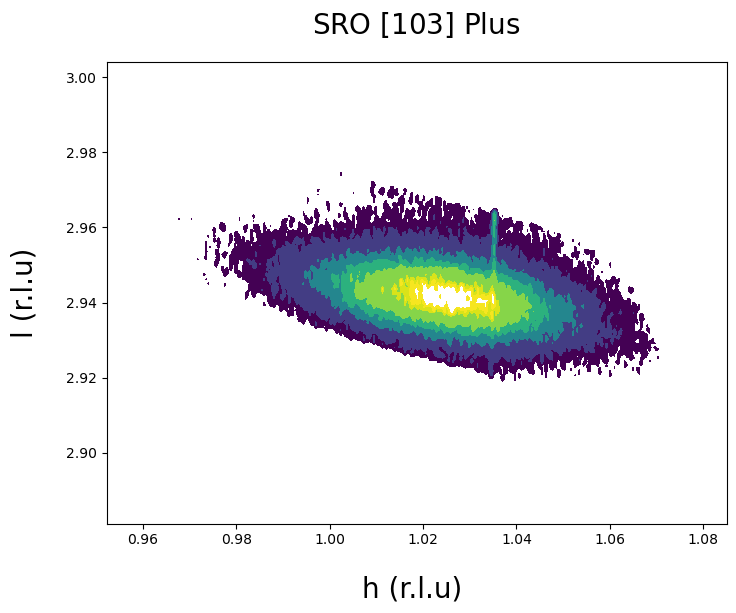

In [8]:
%%time

import sys
np.set_printoptions(threshold=1000) # can change to sys.maxsize, default is 1000

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
cm = plt.get_cmap('inferno', 30)




npts = 200
ngridx = 300
ngridy = 300

for i,data in enumerate(pathlist_SRO_103_plus):
    
    print("i",i)
    print("data",data)

    dataextracted = np.loadtxt(data,encoding="utf-8-sig", unpack = True)
    l = (dataextracted[0])
    h = dataextracted[1]
    counts = dataextracted[2]
    
    l = np.ma.masked_invalid(l)
    h = np.ma.masked_invalid(h)
    
    x = np.linspace(0.952316359, 1.085023209 , ngridx)
    y = np.linspace(3.004203516,2.881096502 , ngridy)
    xi_NNO, yi_NNO = np.meshgrid(x, y)
    
    zi_NNO = griddata((h,l), counts, (xi_NNO, yi_NNO), method='linear')
    zi_NNO = np.ma.masked_invalid(zi_NNO)


    zi_array_NNO = np.asarray(zi_NNO)
    zi_array_one_NNO = np.ndarray.flatten(zi_array_NNO)
    #zi_min = np.nanmin(zi_array_one)
    #zi_max = np.nanmax(zi_array_one)

    
    #yi_NNO = yi_NNO - (STO_max-3)
    
    #NNO Max value at (3.0798,0.986455), found via Excel
    
    #print(np.nanmax(zi_STO))
    
    #y_max = np.where(zi_STO == np.nanmax(zi_STO))[1][0]
    
    #print(y_max)
    #print((3-yi_STO[y_max]))
    
    #xi_NNO_max = 0.9681
    #yi_NNO = yi_NNO + y_correction # Taking into account the fact that interpolation of STO data not perfect, using STO correction can't get correction for NNO
    #xi_NNO = xi_NNO + x_correction # Taking into account the fact that interpolation of STO data not perfect, using STO correction can't get correction for NNO
    
    z_max_NNO = np.where(zi_NNO == np.nanmax(zi_NNO))
    print("z_max_NNO",z_max_NNO)
    y_max_index_NNO = z_max_NNO[0][0] # The yi_STO where we find the max count value, where yi-STO is kept contant and you sweep though a range of values for xi_STO. SO the xi_STO and yi_STO indexes are the same.
    print("y_max index_NNO",y_max_index_NNO)
    print('y_max_NNO',yi_NNO[z_max_NNO])
    x_max_index_NNO = z_max_NNO
    print("x_max index_NNO",x_max_index_NNO)
    print('x_max_NNO',xi_NNO[z_max_NNO])
    
    yi_NNO = yi_NNO + y_correction
    xi_NNO = xi_NNO + x_correction
    
    
    
    
    #x_max_index = z_max
    #x_max_NNO = np.where(zi_NNO == np.nanmax(zi_NNO))  # The linear interpolation of griddata is not perfect...
    #print(x_max_NNO)
    #y_max_NNO = np.where(zi_NNO == np.nanmax(zi_NNO))  # The linear interpolation of griddata is not perfect...
    #print(y_max_NNO)
    #xi_NNO_max = xi_NNO[x_max_NNO]
    #yi_NNO_max = yi_NNO[y_max_NNO]
    
    
    
    #print("yi_NNO",yi_NNO_max)
    
    #qx_Peak_NNO = -0.0319
    #NNO_a_parameter = 0.3905*(1+qx_Peak_NNO-qx_Peak_STO)
    #print('NNO_a_parameter',NNO_a_parameter)

    
    ### For tricontour ###
    #xi = np.ndarray.flatten(xi)
    #yi = np.ndarray.flatten(yi)
    ###########################

    
    
    
    

    
    
    
    #plt.contourf(xi,yi,zi, levels = np.arange(zi_min+4,100+zi_min,0.1),cmap = 'inferno',norm = matplotlib.colors.LogNorm(vmin=np.nanmin(counts)+1, vmax=np.nanmax(counts), clip=False),linewidths = 0.1)
    plt.contourf(xi_NNO,yi_NNO,zi_NNO, levels = [3,5,10,15,20,30,33,35],cmap = 'viridis',norm = matplotlib.colors.LogNorm(vmin = 5,vmax = 35),linewidths = 1, alpha = 1)
    #plt.tricontour(xi,yi,zi_array_one, levels = [3,5,10,15,20,35],cmap = 'binary',norm = matplotlib.colors.LogNorm(vmin = 5,vmax = 35),linewidths = 1, alpha = 1)
    plt.title(r'SRO $[103]$ Plus',fontsize = 20, pad = 20)
    plt.ylabel(r'l (r.l.u)',fontsize =20, labelpad = 20)
    plt.xlabel("h (r.l.u) ",fontsize =20,labelpad = 20)
    #sm = plt.cm.ScalarMappable(cmap=cm,norm =  matplotlib.colors.LogNorm(vmin=np.nanmin(zi_min)+1, vmax=1000, clip=False))
    #cax = fig.add_axes([0.2, 0.65, 0.02, 0.20])
    #cbar = plt.colorbar(sm, cax=cax, shrink = 0.01, orientation='vertical', extend = 'max')
    #cbar_scale=np.arange(np.nanmin(counts),np.nanmax(counts),np.nanmax(counts)/4)
    #norm = matplotlib.colors.LogNorm(vmin=1, vmax=35, clip=False)
    

    
    #plt.savefig(r"C:\Users\pblah\Data\XRD\FM317\RSM\103 Plus\hkl\FM318 103 Plus RSM hkl.png", bbox_inches = "tight")

    
    
    
    
    
    #counts = np.ma.masked_invalid(counts)
    #print(l)
    #print(h)
    #print(counts)
    #print('xi',xi)
    #print('yi',yi)
    #print('zi',zi)
    #print('zi_array_one',zi_array_one)
    #print(zi_min)
    #print(np.nanmin(counts))
    #print(np.nanmax(counts))
    
xi_NNO_plus = xi_NNO
yi_NNO_plus = yi_NNO
zi_NNO_plus = zi_NNO

x_max_index_NNO_plus = xi_NNO[z_max_NNO][0]
y_max_index_NNO_plus = yi_NNO[z_max_NNO][0]
    
    

## Both ##

C:\Users\pblah\AppData\Local\Temp\ipykernel_14560\516850824.py:11: UserWarning: Log scale: values of z <= 0 have been masked
  ax.contourf(xi_NNO,yi_NNO,zi_NNO, levels = [5,10,15,20,25,28,30,33,35],cmap = 'viridis',norm = matplotlib.colors.LogNorm(vmin = 5,vmax = 35),linewidths = 1, alpha = 1)
C:\Users\pblah\AppData\Local\Temp\ipykernel_14560\516850824.py:11: UserWarning: linewidths is ignored by contourf
  ax.contourf(xi_NNO,yi_NNO,zi_NNO, levels = [5,10,15,20,25,28,30,33,35],cmap = 'viridis',norm = matplotlib.colors.LogNorm(vmin = 5,vmax = 35),linewidths = 1, alpha = 1)
C:\Users\pblah\AppData\Local\Temp\ipykernel_14560\516850824.py:12: UserWarning: Log scale: values of z <= 0 have been masked
  ax.contourf(xi_STO,yi_STO,zi_STO, levels = [10,50,100,500,1000,5000,10000,12000,13200,14000,14200,14400],norm = matplotlib.colors.LogNorm(vmin = 5, vmax = 14400),cmap = 'viridis',linewidths = 1, alpha = 1)
C:\Users\pblah\AppData\Local\Temp\ipykernel_14560\516850824.py:12: UserWarning: linewidt

x_difference [-0.02592743]
y_difference [0.05794321]
SRO_a_parameter -4.006246608116188
SRO_c_parameter 3.980422738591048


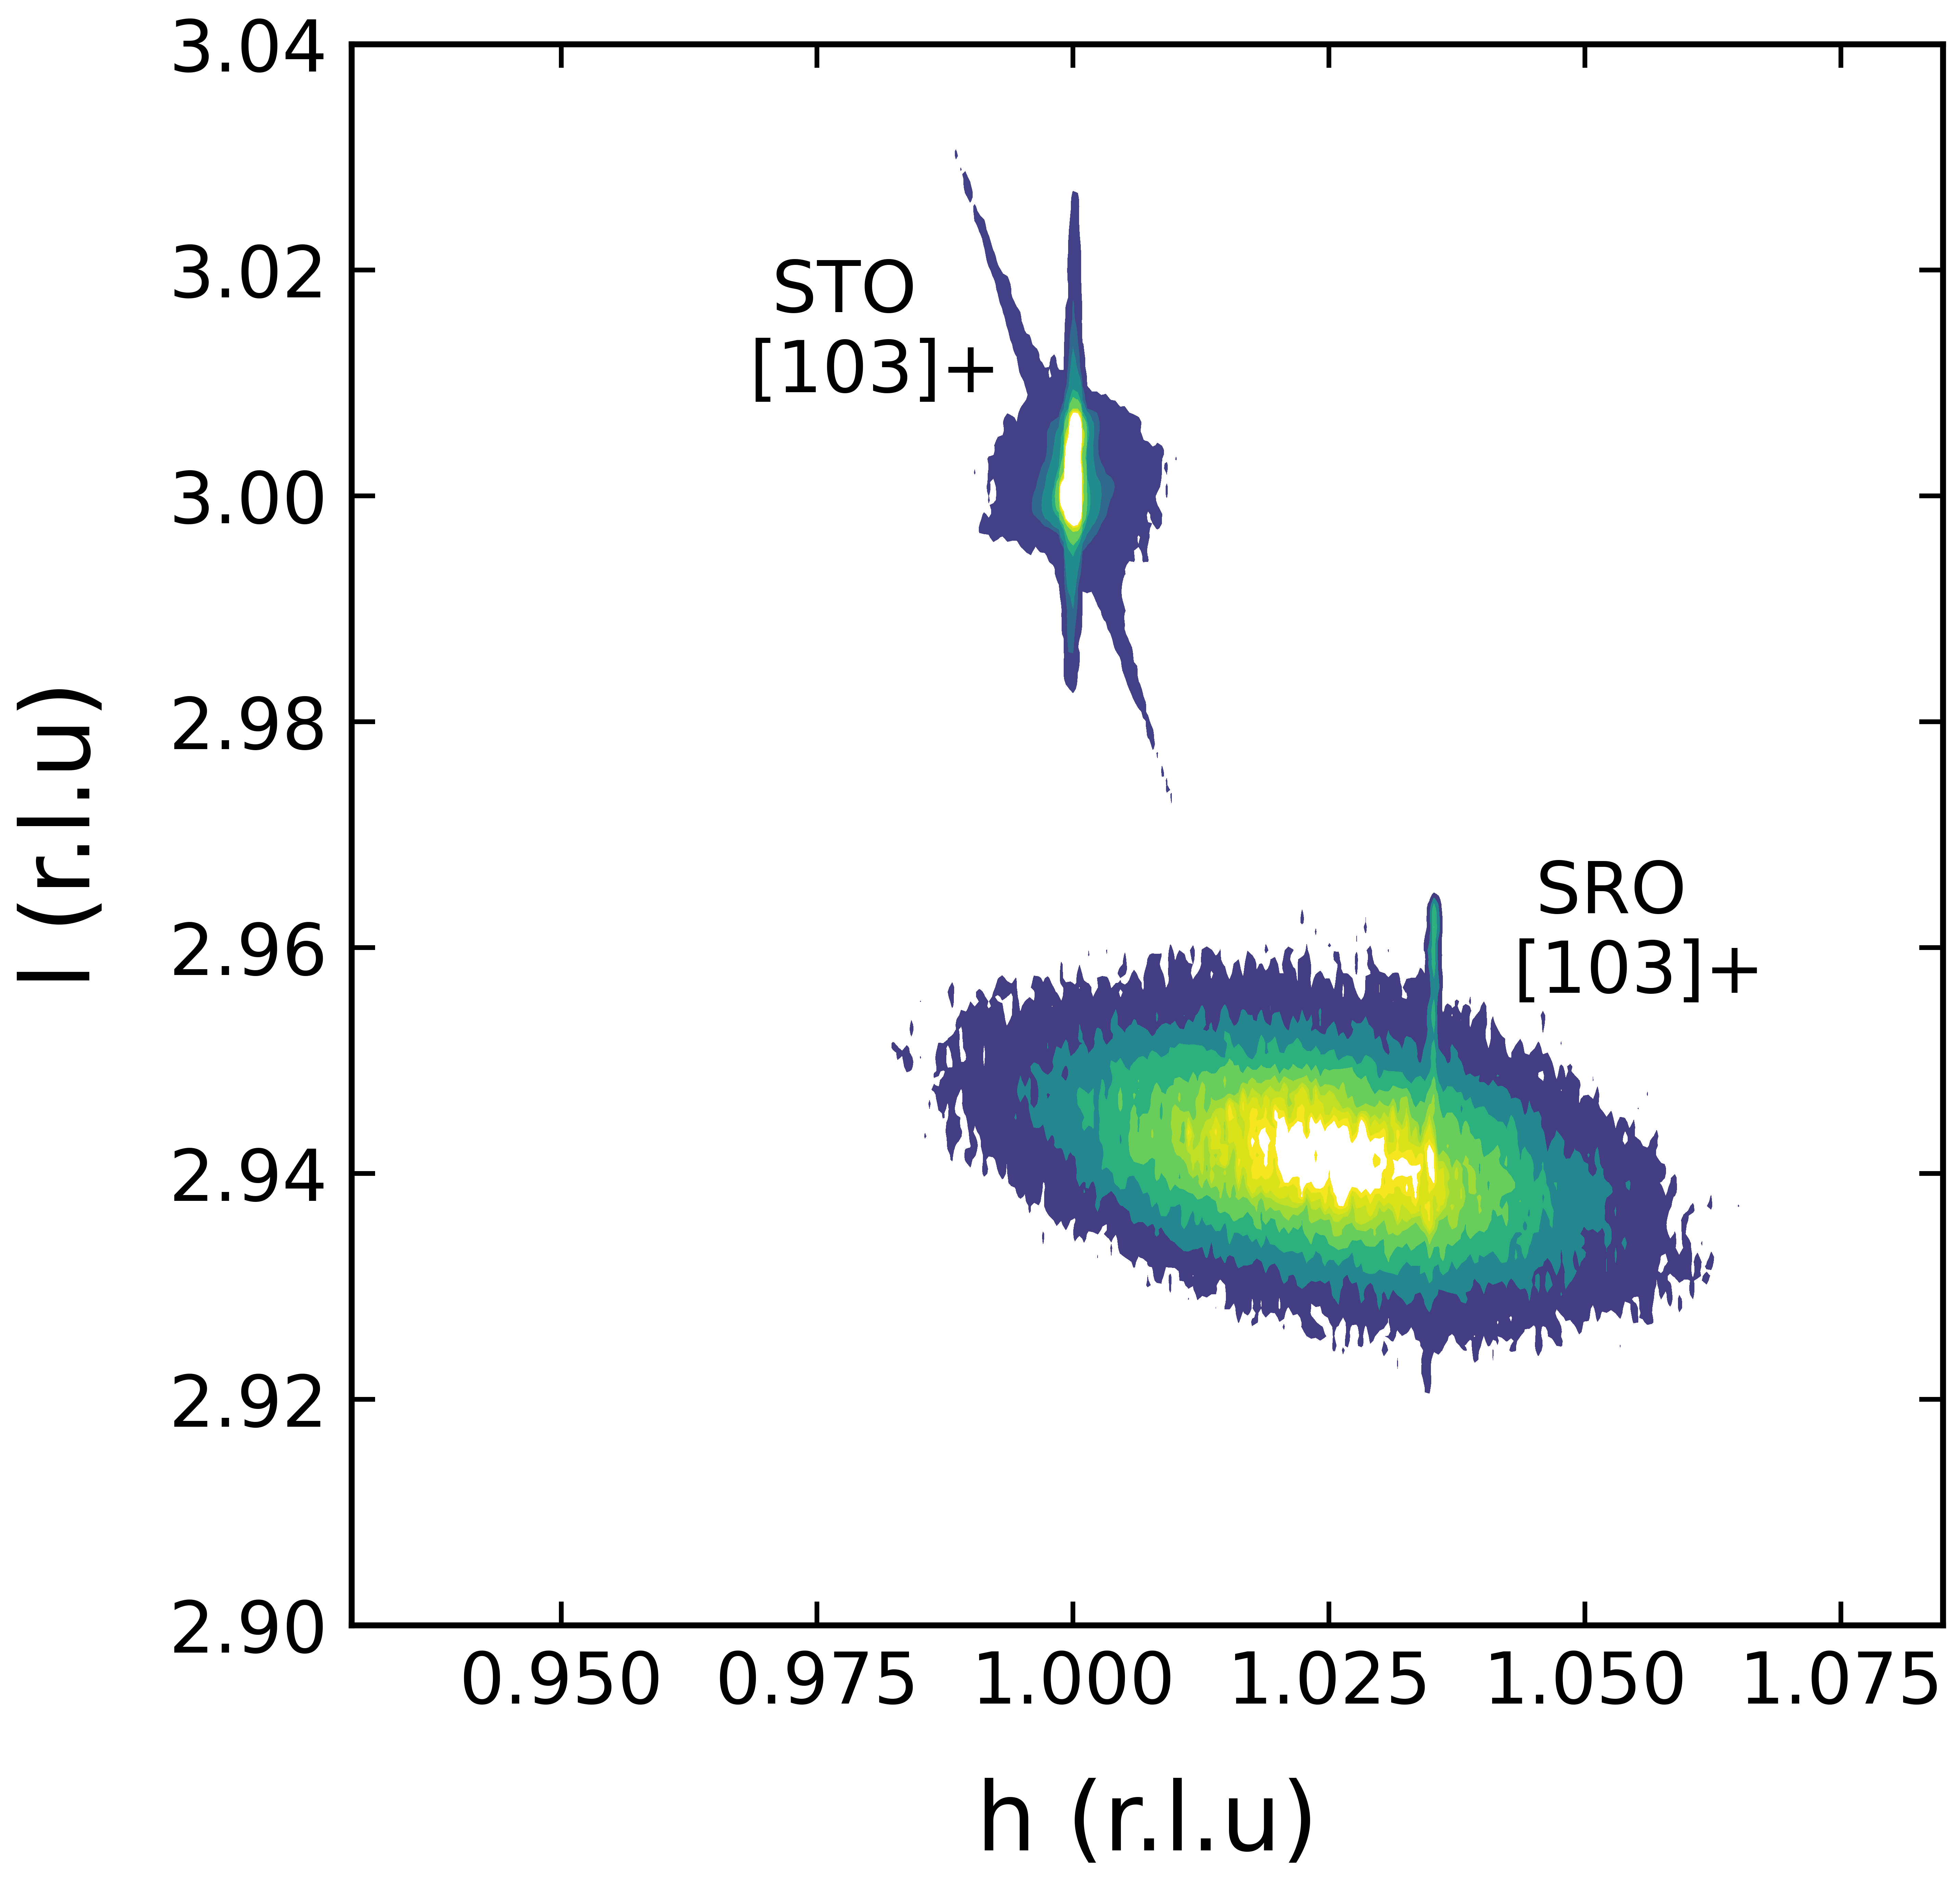

In [9]:
#fig, ax_left = plt.subplots()
#ax_left.contourf(xi_NNO,yi_NNO,zi_NNO, levels = [3,5,10,15,20,35],cmap = 'viridis',norm = matplotlib.colors.LogNorm(vmin = 5,vmax = 35),linewidths = 1, alpha = 1)
#plt.ylabel(r'l (r.l.u)',fontsize =20, labelpad = 20)
#plt.xlabel("h (r.l.u) ",fontsize =20,labelpad = 20)

#ax_right = ax_left.twinx()
#ax_right.contourf(xi_STO,yi_STO,zi_STO, levels = [5,10,50,100,500,1000,5000,10000,12000,13200,14000,14400],norm = matplotlib.colors.LogNorm(vmin = 5, vmax = 14400),cmap = 'viridis',linewidths = 1, alpha = 1)

fig, ax = plt.subplots(figsize=(12, 12), dpi = 500)

ax.contourf(xi_NNO,yi_NNO,zi_NNO, levels = [5,10,15,20,25,28,30,33,35],cmap = 'viridis',norm = matplotlib.colors.LogNorm(vmin = 5,vmax = 35),linewidths = 1, alpha = 1)
ax.contourf(xi_STO,yi_STO,zi_STO, levels = [10,50,100,500,1000,5000,10000,12000,13200,14000,14200,14400],norm = matplotlib.colors.LogNorm(vmin = 5, vmax = 14400),cmap = 'viridis',linewidths = 1, alpha = 1)


   
    
    
    
ax.tick_params(axis = 'x', which='major', labelsize=30, length = 10, width = 2, direction = 'in', pad = 10, top = True)
ax.tick_params(axis = 'y', which='major', labelsize=30, length = 10, width = 2, direction = 'in', pad = 10, right = False)
ax.tick_params(axis = 'y', which='major', labelsize=30, length = 10, width = 2, direction = 'in', pad = 10, right = True)

ax.spines["top"].set_linewidth(2.5)
ax.spines["bottom"].set_linewidth(2.5)
ax.spines["right"].set_linewidth(2.5)
ax.spines["left"].set_linewidth(2.5)

ax.set_ylim(2.9,3.04)

text = ax.text(0.25,0.78, ' STO\n[103]+', size=30, color = 'black',transform = ax.transAxes )
text = ax.text(0.73,0.4, ' SRO\n[103]+', size=30, color = 'black',transform = ax.transAxes )



#plt.vlines(xi_STO[z_max][0],2.9,3.04, color = "red", linestyle = 'dotted', lw = 1)
#plt.vlines(xi_NNO[z_max_NNO][0],2.9,3.04, color = "red",linestyle = 'dotted', lw = 1)

x_difference =  1 - xi_NNO[z_max_NNO]
y_difference = 3-yi_NNO[z_max_NNO]

print('x_difference',x_difference)
print('y_difference',y_difference)

NNO_a_parameter = (3.905 * (-1+x_difference))
NNO_c_parameter = 3.905 * ((3+y_difference)/3)

print('SRO_a_parameter',NNO_a_parameter[0])
print('SRO_c_parameter',NNO_c_parameter[0])






#plt.title(r'$[103]+$ STO and SRO',fontsize = 20, pad = 20)
ax.set_ylabel(r'l (r.l.u)',fontsize=40,labelpad = 25)
ax.set_xlabel(r'h (r.l.u)',fontsize=40,labelpad = 25) 
plt.savefig(r"C:\Users\pblah\Data\XRD\FM332\Figures\FM332_103_Plus_RSM_hkl.png", bbox_inches = "tight")
plt.savefig(r"C:\Users\pblah\Data\XRD\FM332\Figures\FM332_103_Plus_RSM_hkl.pdf", bbox_inches = "tight", format = "pdf")
plt.show()

## STO 103 Minus ##

i 0
data C:\Users\pblah\Data\XRD\FM332\Exfoliated\RSM\hkl\Analysed\STO 103-\Take_2_STO_103-_hkl.txt
112200
max count value 978702.0958366791
max count value index (array([152], dtype=int64), array([152], dtype=int64))
z_max (array([152], dtype=int64), array([152], dtype=int64))
y_max index 152
y_max [3.00023645]
x_max index (array([152], dtype=int64), array([152], dtype=int64))
x_max [-1.00074221]
-0.00023645484949819107
0.00074220735785957
CPU times: total: 1.11 s
Wall time: 1.1 s


<timed exec>:91: UserWarning: Log scale: values of z <= 0 have been masked
<timed exec>:91: UserWarning: linewidths is ignored by contourf


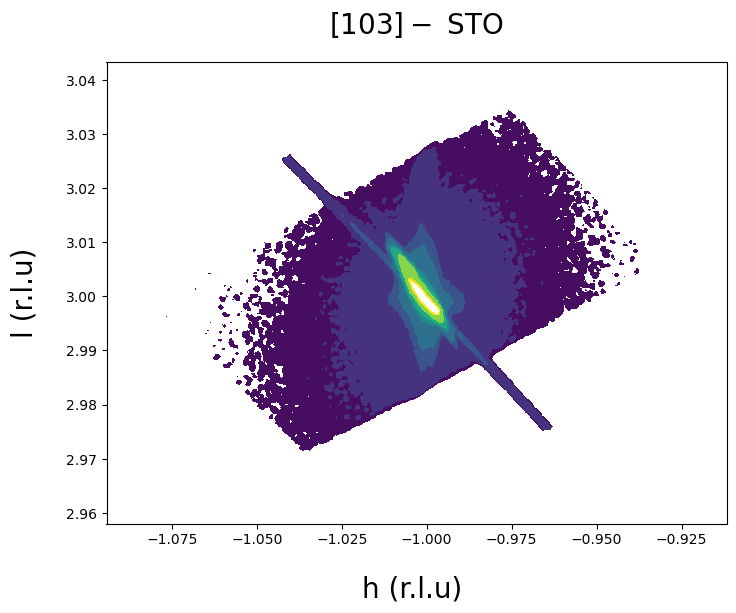

In [10]:
%%time

import sys
np.set_printoptions(threshold=1000) # can change to sys.maxsize, default is 1000

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
cm = plt.get_cmap('inferno', 30)




#npts = 200
ngridx = 300
ngridy = 300

for i,data in enumerate(pathlist_STO_103_minus):
    
    print("i",i)
    print("data",data)

    dataextracted = np.loadtxt(data,encoding="utf-8-sig", unpack = True)
    l = dataextracted[0]
    h = dataextracted[1]
    counts = dataextracted[2]
    
    l = np.ma.masked_invalid(l)
    h = np.ma.masked_invalid(h)
    
    print(len(h))
    

    x = np.linspace(-1.09348, -0.911055 , ngridx)
    y = np.linspace(3.04362,2.95828 , ngridy)
    xi_STO, yi_STO = np.meshgrid(x, y)
  
    zi_STO = griddata((h,l), counts, (xi_STO, yi_STO), method='linear')
    zi_STO = np.ma.masked_invalid(zi_STO)
    zi_array_STO = np.asarray(zi_STO)
    zi_array_one_STO = np.ndarray.flatten(zi_array_STO)
    
    print("max count value",np.nanmax(zi_STO))
    print("max count value index",np.where(zi_STO == np.nanmax(zi_STO)))
    z_max = np.where(zi_STO == np.nanmax(zi_STO))  # The linear interpolation of griddata is not perfect...Note: Say you get array[149],array[152]. This means it's the 152nd element of the xi_STO array. The xi-STO array goes over a range while yi_STO stays the same.
    print("z_max",z_max)
    y_max_index = z_max[0][0] # The yi_STO where we find the max count value, where yi-STO is kept contant and you sweep though a range of values for xi_STO. SO the xi_STO and yi_STO indexes are the same.
    print("y_max index",y_max_index)
    print('y_max',yi_STO[z_max])
    x_max_index = z_max
    print("x_max index",x_max_index)
    print('x_max',xi_STO[z_max])
  
    y_correction = (3-yi_STO[y_max_index])[0]
    x_correction = (-1-xi_STO[x_max_index][0])
    print(y_correction)
    print(x_correction)
    
    
    ###### Showing what I explained in comment of z_max ######
    #x_max_index = z_max[0][0]
    #print("x_max index",x_max_index)
    #print("zi_STO with x_max index", zi_STO[x_max_index])
    #print("index of max value in 'zi_STO with x_max index'",np.where(zi_STO[x_max_index] == np.nanmax(zi_STO[x_max_index]))[0][0]) 
    #print("x_max index actual",zi_STO[x_max_index][152])
    ##################################################
  

    
    
    
    
    yi_STO = yi_STO + y_correction
    xi_STO = xi_STO - x_correction
    
    

    #zi_min = np.nanmin(zi_array_one)
    #zi_max = np.nanmax(zi_array_one)
    
    
    #STO Max value at (8.0998, 0.002905), found via excel
    #STO Max value at (3.03326, 0.002905), found via excel after converting

    #qx_Peak_STO = 0.0029
    
    #NNO Max value at (8.3042,-0.0319), found via Excel
    
    #qx_Peak_NNO = -0.0319
    #NNO_a_parameter = 0.3905*(1+qx_Peak_NNO-qx_Peak_STO)
    #print('NNO_a_parameter',NNO_a_parameter)
    
    #plt.contour(xi,yi,zi, levels = np.arange(zi_min+4,100+zi_min,0.01),cmap = 'inferno',norm = matplotlib.colors.LogNorm(vmin=np.nanmin(counts)+1, vmax=np.nanmax(counts), clip=False),linewidths = 0.1)
    plt.contourf(xi_STO,yi_STO,zi_STO, levels = [5,10,50,100,500,1000,5000,100000,120000,132000,140000,142000,143000,144500],norm = matplotlib.colors.LogNorm(vmin = 5, vmax = 144500),cmap = 'viridis',linewidths = 1, alpha = 1)
    plt.title(r'$[103]-$ STO',fontsize = 20, pad = 20)
    plt.ylabel(r'l (r.l.u)',fontsize =20, labelpad = 20)
    plt.xlabel("h (r.l.u) ",fontsize =20,labelpad = 20)
    #plt.hlines(3,0.9525,1.05)
    #sm = plt.cm.ScalarMappable(cmap=cm,norm =  matplotlib.colors.LogNorm(vmin=np.nanmin(zi_min)+1, vmax=1000, clip=False))
    #cax = fig.add_axes([0.2, 0.65, 0.02, 0.20])
    #cbar = plt.colorbar(sm, cax=cax, shrink = 0.01, orientation='vertical', extend = 'max')
    #cbar_scale=np.arange(np.nanmin(counts),np.nanmax(counts),np.nanmax(counts)/4)
    

    
    #plt.savefig(r"C:\Users\pblah\Data\XRD\FM317\RSM\103 Plus\hkl\FM318 103 Plus RSM hkl.png", bbox_inches = "tight")

    
    
    
    
    
    #counts = np.ma.masked_invalid(counts)
    #print(l)
    #print(h)
    #print(counts)
    #print('xi',xi)
    #print('yi',yi)
    #print('zi',zi)
    #print('zi_array_one',zi_array_one)
    #print(zi_min)
    #print(np.nanmin(counts))
    #print(np.nanmax(counts))
    
xi_STO_minus = xi_STO
yi_STO_minus = yi_STO
zi_STO_minus = zi_STO

y_max_index_minus = yi_STO[z_max][0]
x_max_index_minus = xi_STO[z_max][0]

## SRO 103 Minus ##

i 0
data C:\Users\pblah\Data\XRD\FM332\Exfoliated\RSM\hkl\Analysed\SRO 103-\Take_2_SRO_103-_hkl.txt
z_max_NNO (array([150], dtype=int64), array([145], dtype=int64))
y_max index_NNO 150
y_max_NNO [2.96526716]
x_max index_NNO (array([150], dtype=int64), array([145], dtype=int64))
x_max_NNO [-0.95184311]
CPU times: total: 1.09 s
Wall time: 1.1 s


<timed exec>:103: UserWarning: Log scale: values of z <= 0 have been masked
<timed exec>:103: UserWarning: linewidths is ignored by contourf


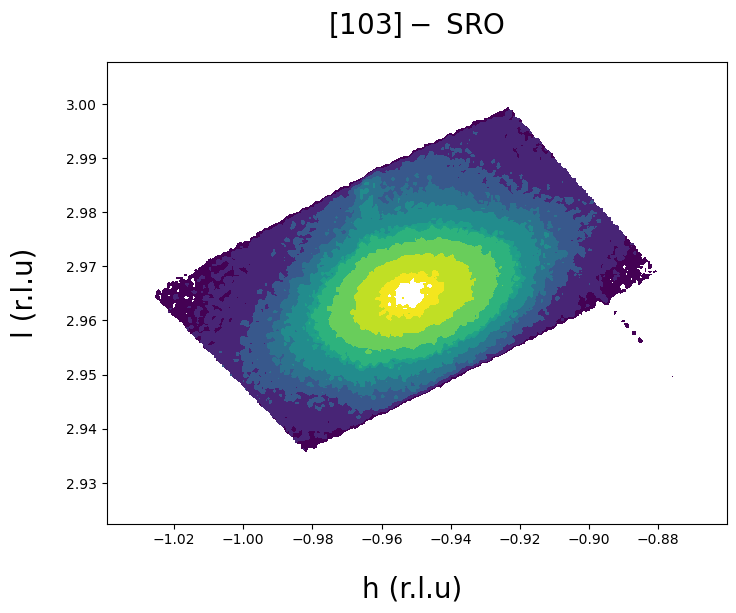

In [11]:
%%time

import sys
np.set_printoptions(threshold=1000) # can change to sys.maxsize, default is 1000

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
cm = plt.get_cmap('inferno', 30)




npts = 200
ngridx = 300
ngridy = 300

for i,data in enumerate(pathlist_SRO_103_minus):
    
    print("i",i)
    print("data",data)

    dataextracted = np.loadtxt(data,encoding="utf-8-sig", unpack = True)
    l = (dataextracted[0])
    h = dataextracted[1]
    counts = dataextracted[2]
    
    l = np.ma.masked_invalid(l)
    h = np.ma.masked_invalid(h)
    
    x = np.linspace(-1.03875, -0.859542 , ngridx)
    y = np.linspace(3.00812,2.9227 , ngridy)
    xi_NNO, yi_NNO = np.meshgrid(x, y)
    
    zi_NNO = griddata((h,l), counts, (xi_NNO, yi_NNO), method='linear')
    zi_NNO = np.ma.masked_invalid(zi_NNO)


    zi_array_NNO = np.asarray(zi_NNO)
    zi_array_one_NNO = np.ndarray.flatten(zi_array_NNO)
    #zi_min = np.nanmin(zi_array_one)
    #zi_max = np.nanmax(zi_array_one)

    
    #yi_NNO = yi_NNO - (STO_max-3)
    
    #NNO Max value at (3.0798,0.986455), found via Excel
    
    #print(np.nanmax(zi_STO))
    
    #y_max = np.where(zi_STO == np.nanmax(zi_STO))[1][0]
    
    #print(y_max)
    #print((3-yi_STO[y_max]))
    
    #xi_NNO_max = 0.9681
    #yi_NNO = yi_NNO + y_correction # Taking into account the fact that interpolation of STO data not perfect, using STO correction can't get correction for NNO
    #xi_NNO = xi_NNO + x_correction # Taking into account the fact that interpolation of STO data not perfect, using STO correction can't get correction for NNO
    
    z_max_NNO = np.where(zi_NNO == np.nanmax(zi_NNO))
    print("z_max_NNO",z_max_NNO)
    y_max_index_NNO = z_max_NNO[0][0] # The yi_STO where we find the max count value, where yi-STO is kept contant and you sweep though a range of values for xi_STO. SO the xi_STO and yi_STO indexes are the same.
    print("y_max index_NNO",y_max_index_NNO)
    print('y_max_NNO',yi_NNO[z_max_NNO])
    x_max_index_NNO = z_max_NNO
    print("x_max index_NNO",x_max_index_NNO)
    print('x_max_NNO',xi_NNO[z_max_NNO])
    
    yi_NNO = yi_NNO + y_correction
    xi_NNO = xi_NNO - x_correction
    
    
    
    
    #x_max_index = z_max
    #x_max_NNO = np.where(zi_NNO == np.nanmax(zi_NNO))  # The linear interpolation of griddata is not perfect...
    #print(x_max_NNO)
    #y_max_NNO = np.where(zi_NNO == np.nanmax(zi_NNO))  # The linear interpolation of griddata is not perfect...
    #print(y_max_NNO)
    #xi_NNO_max = xi_NNO[x_max_NNO]
    #yi_NNO_max = yi_NNO[y_max_NNO]
    
    
    
    #print("yi_NNO",yi_NNO_max)
    
    #qx_Peak_NNO = -0.0319
    #NNO_a_parameter = 0.3905*(1+qx_Peak_NNO-qx_Peak_STO)
    #print('NNO_a_parameter',NNO_a_parameter)

    
    ### For tricontour ###
    #xi = np.ndarray.flatten(xi)
    #yi = np.ndarray.flatten(yi)
    ###########################

    
    
    
    

    
    
    
    #plt.contourf(xi,yi,zi, levels = np.arange(zi_min+4,100+zi_min,0.1),cmap = 'inferno',norm = matplotlib.colors.LogNorm(vmin=np.nanmin(counts)+1, vmax=np.nanmax(counts), clip=False),linewidths = 0.1)
    plt.contourf(xi_NNO,yi_NNO,zi_NNO, levels = [3,5,10,15,20,30,33,35,50,80,120,135],cmap = 'viridis',norm = matplotlib.colors.LogNorm(vmin = 5,vmax = 135),linewidths = 1, alpha = 1)
    #plt.tricontour(xi,yi,zi_array_one, levels = [3,5,10,15,20,35],cmap = 'binary',norm = matplotlib.colors.LogNorm(vmin = 5,vmax = 35),linewidths = 1, alpha = 1)
    plt.title(r'$[103]-$ SRO',fontsize = 20, pad = 20)
    plt.ylabel(r'l (r.l.u)',fontsize =20, labelpad = 20)
    plt.xlabel("h (r.l.u) ",fontsize =20,labelpad = 20)
    #sm = plt.cm.ScalarMappable(cmap=cm,norm =  matplotlib.colors.LogNorm(vmin=np.nanmin(zi_min)+1, vmax=1000, clip=False))
    #cax = fig.add_axes([0.2, 0.65, 0.02, 0.20])
    #cbar = plt.colorbar(sm, cax=cax, shrink = 0.01, orientation='vertical', extend = 'max')
    #cbar_scale=np.arange(np.nanmin(counts),np.nanmax(counts),np.nanmax(counts)/4)
    #norm = matplotlib.colors.LogNorm(vmin=1, vmax=35, clip=False)
    

    
    #plt.savefig(r"C:\Users\pblah\Data\XRD\FM317\RSM\103 Plus\hkl\FM318 103 Plus RSM hkl.png", bbox_inches = "tight")

    
    
    
    
    
    #counts = np.ma.masked_invalid(counts)
    #print(l)
    #print(h)
    #print(counts)
    #print('xi',xi)
    #print('yi',yi)
    #print('zi',zi)
    #print('zi_array_one',zi_array_one)
    #print(zi_min)
    #print(np.nanmin(counts))
    #print(np.nanmax(counts))
    
xi_NNO_minus = xi_NNO
yi_NNO_minus = yi_NNO
zi_NNO_minus = zi_NNO

y_max_index_NNO_minus = yi_NNO[z_max_NNO][0]
x_max_index_NNO_minus = xi_NNO[z_max_NNO][0]

## Both ##

C:\Users\pblah\AppData\Local\Temp\ipykernel_14560\2890475953.py:12: UserWarning: Log scale: values of z <= 0 have been masked
  ax.contourf(xi_NNO,yi_NNO,zi_NNO, levels = [12,15,20,25,28,30,33,35,50,80,120,135],cmap = 'viridis',norm = matplotlib.colors.LogNorm(vmin = 12,vmax = 135),linewidths = 1, alpha = 1)
C:\Users\pblah\AppData\Local\Temp\ipykernel_14560\2890475953.py:12: UserWarning: linewidths is ignored by contourf
  ax.contourf(xi_NNO,yi_NNO,zi_NNO, levels = [12,15,20,25,28,30,33,35,50,80,120,135],cmap = 'viridis',norm = matplotlib.colors.LogNorm(vmin = 12,vmax = 135),linewidths = 1, alpha = 1)
C:\Users\pblah\AppData\Local\Temp\ipykernel_14560\2890475953.py:13: UserWarning: Log scale: values of z <= 0 have been masked
  ax.contourf(xi_STO,yi_STO,zi_STO, levels = [20,50,100,500,1000,5000,10000,12000,13200,14000,14200,14400],norm = matplotlib.colors.LogNorm(vmin = 5, vmax = 14400),cmap = 'viridis',linewidths = 1, alpha = 1)
C:\Users\pblah\AppData\Local\Temp\ipykernel_14560\2890475

x_difference [-0.04741468]
y_difference [0.0349693]
SRO_a_parameter 4.0901543342809354
SRO_c_parameter 3.950518369119286


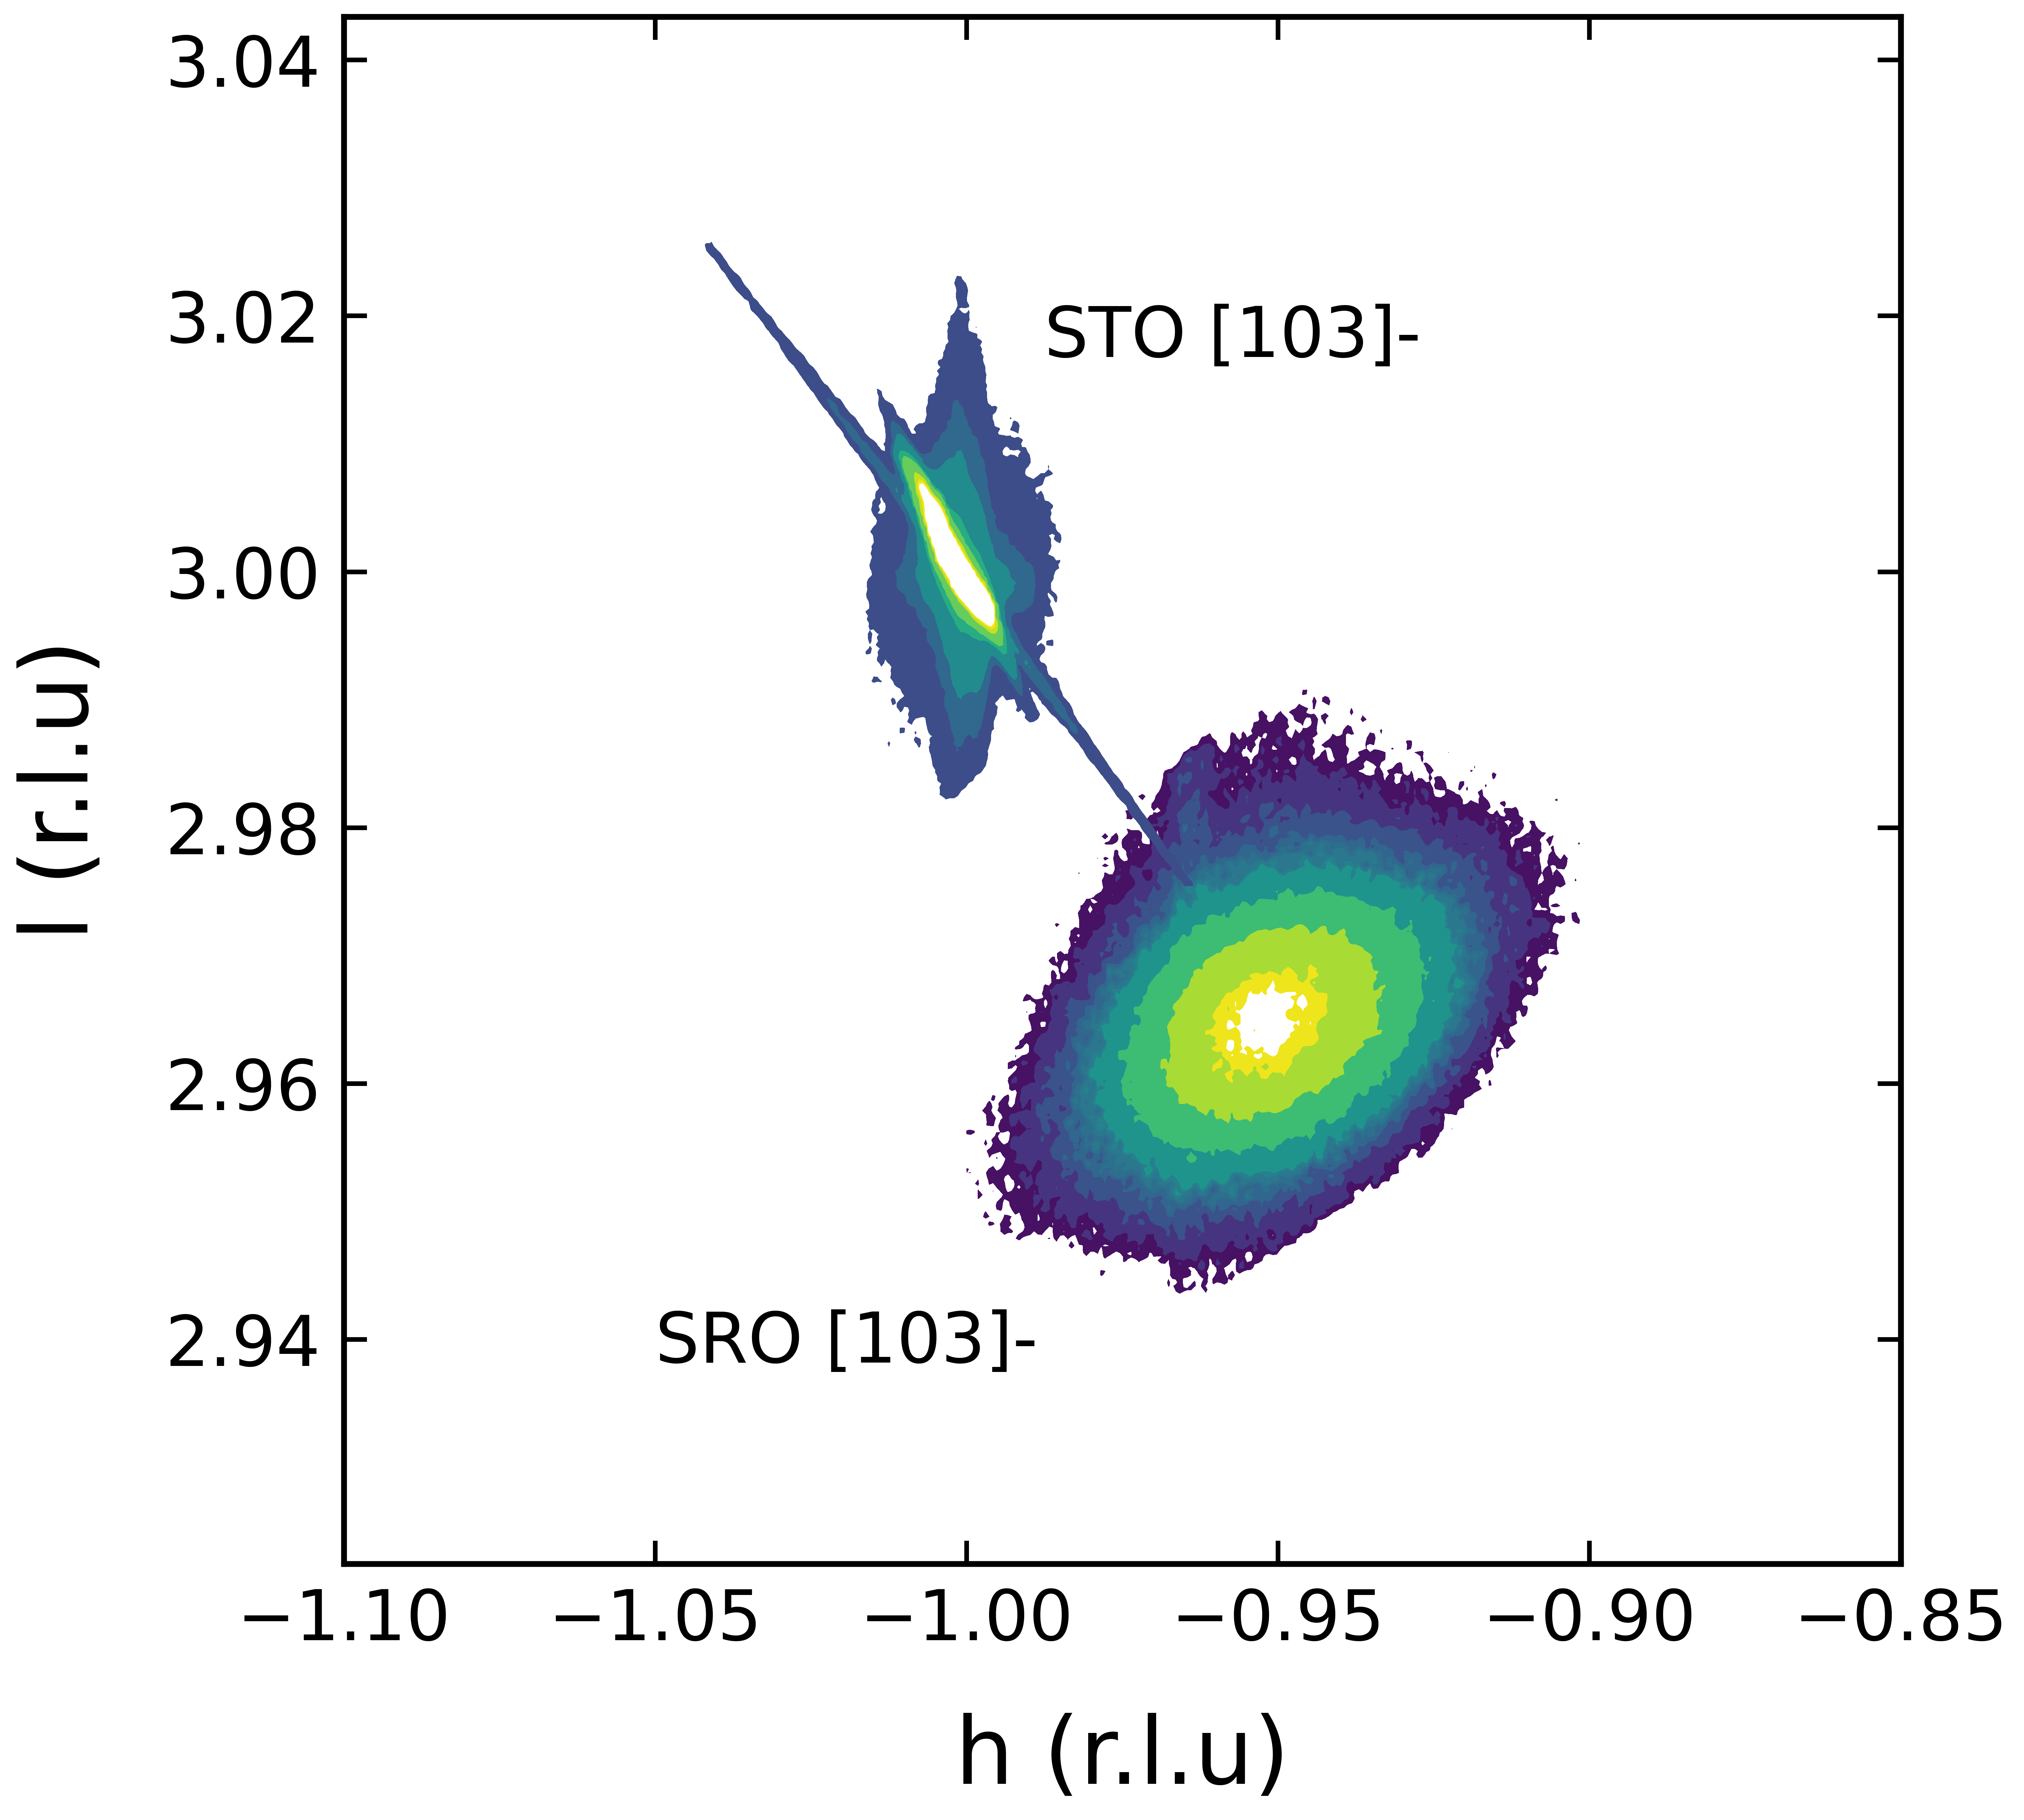

In [12]:
#fig, ax_left = plt.subplots()
#ax_left.contourf(xi_NNO,yi_NNO,zi_NNO, levels = [3,5,10,15,20,35],cmap = 'viridis',norm = matplotlib.colors.LogNorm(vmin = 5,vmax = 35),linewidths = 1, alpha = 1)
#plt.ylabel(r'l (r.l.u)',fontsize =20, labelpad = 20)
#plt.xlabel("h (r.l.u) ",fontsize =20,labelpad = 20)

#ax_right = ax_left.twinx()
#ax_right.contourf(xi_STO,yi_STO,zi_STO, levels = [5,10,50,100,500,1000,5000,10000,12000,13200,14000,14400],norm = matplotlib.colors.LogNorm(vmin = 5, vmax = 14400),cmap = 'viridis',linewidths = 1, alpha = 1)

fig, ax = plt.subplots(figsize=(12, 12), dpi = 500)


ax.contourf(xi_NNO,yi_NNO,zi_NNO, levels = [12,15,20,25,28,30,33,35,50,80,120,135],cmap = 'viridis',norm = matplotlib.colors.LogNorm(vmin = 12,vmax = 135),linewidths = 1, alpha = 1)
ax.contourf(xi_STO,yi_STO,zi_STO, levels = [20,50,100,500,1000,5000,10000,12000,13200,14000,14200,14400],norm = matplotlib.colors.LogNorm(vmin = 5, vmax = 14400),cmap = 'viridis',linewidths = 1, alpha = 1)

#plt.vlines(xi_STO_max,2.97,3.1, color = "red")
#plt.vlines(xi_NNO_max,2.97,3.1, color = "red")

    
ax.tick_params(axis = 'x', which='major', labelsize=30, length = 10, width = 2, direction = 'in', pad = 10, top = True)
ax.tick_params(axis = 'y', which='major', labelsize=30, length = 10, width = 2, direction = 'in', pad = 10, right = False)
ax.tick_params(axis = 'y', which='major', labelsize=30, length = 10, width = 2, direction = 'in', pad = 10, right = True)

ax.spines["top"].set_linewidth(2.5)
ax.spines["bottom"].set_linewidth(2.5)
ax.spines["right"].set_linewidth(2.5)
ax.spines["left"].set_linewidth(2.5)

ax.set_xlim(-1.1,-0.85)

text = ax.text(0.45,0.78, 'STO [103]-', size=30, color = 'black',transform = ax.transAxes )
text = ax.text(0.2,0.13, 'SRO [103]-', size=30, color = 'black',transform = ax.transAxes )

x_difference =  -1 - xi_NNO[z_max_NNO]
y_difference = 3-yi_NNO[z_max_NNO]

print('x_difference',x_difference)
print('y_difference',y_difference)

NNO_a_parameter = 3.905 * (1-x_difference)
NNO_c_parameter = 3.905 * ((3 + y_difference)/3)

print('SRO_a_parameter',NNO_a_parameter[0])
print('SRO_c_parameter',NNO_c_parameter[0])






#plt.title(r'$[103]-$ STO and SRO',fontsize = 20, pad = 20)
ax.set_ylabel(r'l (r.l.u)',fontsize=40,labelpad = 25)
ax.set_xlabel(r'h (r.l.u)',fontsize=40,labelpad = 25) 
plt.savefig(r"C:\Users\pblah\Data\XRD\FM332\Figures\FM332_103_Minus_RSM_hkl.png", bbox_inches = "tight")
plt.savefig(r"C:\Users\pblah\Data\XRD\FM332\Figures\FM332_103_Minus_RSM_hkl.pdf", bbox_inches = "tight", format = "pdf")
plt.show()

i 0
data C:\Users\pblah\Data\XRD\FM332\Exfoliated\RSM\hkl\Analysed\STO 103-\Take_2_STO_103-_hkl.txt
112200
max count value 978702.0958366791
max count value index (array([152], dtype=int64), array([152], dtype=int64))
z_max (array([152], dtype=int64), array([152], dtype=int64))
y_max index 152
y_max [3.00023645]
x_max index (array([152], dtype=int64), array([152], dtype=int64))
x_max [-1.00074221]
y_correction_minus -0.00023645484949819107
x_correction_minus -0.00074220735785957
CPU times: total: 2.09 s
Wall time: 2.11 s


<timed exec>:106: UserWarning: Log scale: values of z <= 0 have been masked
<timed exec>:106: UserWarning: linewidths is ignored by contourf


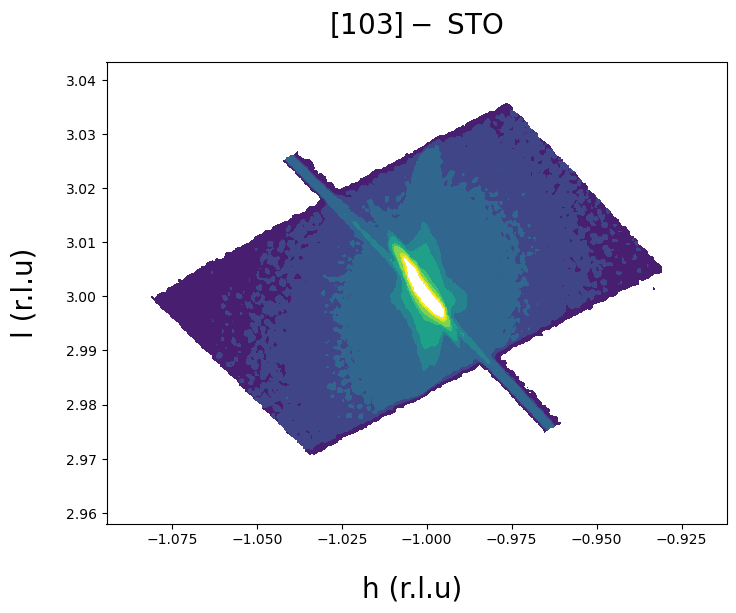

In [20]:
%%time

import sys
np.set_printoptions(threshold=1000) # can change to sys.maxsize, default is 1000

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
cm = plt.get_cmap('inferno', 30)




#npts = 200
ngridx = 300
ngridy = 300

for i,data in enumerate(pathlist_STO_103_minus):
    
    print("i",i)
    print("data",data)

    dataextracted = np.loadtxt(data,encoding="utf-8-sig", unpack = True)
    l = dataextracted[0]
    h = dataextracted[1]
    counts = dataextracted[2]
    
    l = np.ma.masked_invalid(l)
    h = np.ma.masked_invalid(h)
    
    print(len(h))
    

    
    x_minus = np.linspace(-1.09348, -0.911055 , ngridx)
    y_minus = np.linspace(3.04362,2.95828 , ngridy)
    xi_STO_minus, yi_STO_minus = np.meshgrid(x_minus, y_minus)
  
    zi_STO_minus = griddata((h,l), counts, (xi_STO_minus, yi_STO_minus), method='linear')
    #print(zi_STO_minus)
    zi_STO_minus = np.ma.masked_invalid(zi_STO_minus)
    zi_array_STO_minus = np.asarray(zi_STO_minus)
    zi_array_one_STO_minus = np.ndarray.flatten(zi_array_STO_minus)
    

    
    
    
    #########################################################################################
    print("max count value",np.nanmax(zi_STO_minus))
    print("max count value index",np.where(zi_STO_minus == np.nanmax(zi_STO_minus)))
    z_max_minus = np.where(zi_STO_minus == np.nanmax(zi_STO_minus))  # The linear interpolation of griddata is not perfect...Note: Say you get array[149],array[152]. This means it's the 152nd element of the xi_STO array. The xi-STO array goes over a range while yi_STO stays the same.
    print("z_max",z_max_minus)
    y_max_index_minus = z_max_minus[0][0] # The yi_STO where we find the max count value, where yi-STO is kept contant and you sweep though a range of values for xi_STO. SO the xi_STO and yi_STO indexes are the same.
    print("y_max index",y_max_index_minus)
    print('y_max',yi_STO_minus[z_max_minus])
    x_max_index_minus = z_max_minus
    print("x_max index",x_max_index_minus)
    print('x_max',xi_STO_minus[z_max_minus])
  
    y_correction_minus = (3-yi_STO_minus[y_max_index_minus])[0]
    x_correction_minus = (1+xi_STO_minus[x_max_index_minus][0])
    print('y_correction_minus',y_correction_minus)
    print('x_correction_minus',x_correction_minus)
    
    
    ###### Showing what I explained in comment of z_max ######
    #x_max_index = z_max[0][0]
    #print("x_max index",x_max_index)
    #print("zi_STO with x_max index", zi_STO[x_max_index])
    #print("index of max value in 'zi_STO with x_max index'",np.where(zi_STO[x_max_index] == np.nanmax(zi_STO[x_max_index]))[0][0]) 
    #print("x_max index actual",zi_STO[x_max_index][152])
    ##################################################
  
    #############################################################
    yi_STO_minus = yi_STO_minus + y_correction_minus
    xi_STO_minus = xi_STO_minus + x_correction_minus
    
    zi_STO_minus = griddata((h,l), counts, (xi_STO_minus, yi_STO_minus), method='linear')
    #print(zi_STO_minus)
    zi_STO_minus = np.ma.masked_invalid(zi_STO_minus)
    zi_array_STO_minus = np.asarray(zi_STO_minus)
    zi_array_one_STO_minus = np.ndarray.flatten(zi_array_STO_minus)

    
    

    #zi_min = np.nanmin(zi_array_one)
    #zi_max = np.nanmax(zi_array_one)
    
    
    #STO Max value at (8.0998, 0.002905), found via excel
    #STO Max value at (3.03326, 0.002905), found via excel after converting

    #qx_Peak_STO = 0.0029
    
    #NNO Max value at (8.3042,-0.0319), found via Excel
    
    #qx_Peak_NNO = -0.0319
    #NNO_a_parameter = 0.3905*(1+qx_Peak_NNO-qx_Peak_STO)
    #print('NNO_a_parameter',NNO_a_parameter)
    
    #print(xi_STO)
    
    #plt.contour(xi,yi,zi, levels = np.arange(zi_min+4,100+zi_min,0.01),cmap = 'inferno',norm = matplotlib.colors.LogNorm(vmin=np.nanmin(counts)+1, vmax=np.nanmax(counts), clip=False),linewidths = 0.1)
    ###########################################################
    
    
    plt.contourf(xi_STO_minus,yi_STO_minus,zi_STO_minus, levels = [1,5,10,50,100,500,1000,5000,10000,12000,13200,14000,14200,14400],norm = matplotlib.colors.LogNorm(vmin = 1, vmax = 14400),cmap = 'viridis',linewidths = 1, alpha = 1)
    plt.title(r'$[103]-$ STO',fontsize = 20, pad = 20)
    plt.ylabel(r'l (r.l.u)',fontsize =20, labelpad = 20)
    plt.xlabel("h (r.l.u) ",fontsize =20,labelpad = 20)

    
    
    
    
    #####################################################################
    #plt.hlines(3,0.9525,1.05)
    #sm = plt.cm.ScalarMappable(cmap=cm,norm =  matplotlib.colors.LogNorm(vmin=np.nanmin(zi_min)+1, vmax=1000, clip=False))
    #cax = fig.add_axes([0.2, 0.65, 0.02, 0.20])
    #cbar = plt.colorbar(sm, cax=cax, shrink = 0.01, orientation='vertical', extend = 'max')
    #cbar_scale=np.arange(np.nanmin(counts),np.nanmax(counts),np.nanmax(counts)/4)
    

    
    #plt.savefig(r"C:\Users\pblah\Data\XRD\FM317\RSM\113 minus\Figures\Take 2 Analysis\FM317_103_Minus_RSM_hkl.png", bbox_inches = "tight")
    #plt.savefig(r"C:\Users\pblah\Data\XRD\FM317\RSM\113 minus\Figures\Take 2 Analysis\FM317_103_Minus_RSM_hkl.pdf", bbox_inches = "tight", format = "pdf")

    
    
    
    
    
    #counts = np.ma.masked_invalid(counts)
    #print(l)
    #print(h)
    #print(counts)
    #print('xi',xi)
    #print('yi',yi)
    #print('zi',zi)
    #print('zi_array_one',zi_array_one)
    #print(zi_min)
    #print(np.nanmin(counts))
    #print(np.nanmax(counts))

In [ ]:
    x = np.linspace(-1.09348, -0.911055 , ngridx)
    y = np.linspace(3.04362,2.95828 , ngridy)

[-0.9525853177257526, 1.0259274284548496] x_maxes_NNO
[-1.0014844147157191, -1.0014844147157191] x_maxes_STO
[2.9650307023411373, 2.942056794936455] y_maxes_NNO
[3.0, 3.0] y_maxes_STO
a 2.953969562135325
b -0.011611705534387786
Polynomial Fit 1st Order 2.95396956 - 0.01161171 x
left_edge_length 0.011061140205812503
bottom_edge_length 0.9525853177257526
hypo 0.9526495349126696
ratios 0.011611705534387612
angle 0.011611183701249419
rotation_matrix_minus [[0.9999325909638712, -0.011610922800509729], [0.011610922800509729, 0.9999325909638712]]
vector_minus [[-0.9525853177257526], [2.9650307023411373]]
vector_NNO_minus_rotated [[-0.98694785]
 [ 2.95377044]]
right_edge_length 0.011061140205812503
right_bottom_edge_length 1.0259274284548496
hypo_right 1.025996589896046
ratios_right 0.011611705534387612
angle_right 0.01161222743788862
rotation_matrix_plus [[0.9999325909638712, -0.011610922800509729], [0.011610922800509729, 0.9999325909638712]]
vector_plus [[1.0259274284548496], [2.942056794936

C:\Users\pblah\AppData\Local\Temp\ipykernel_14560\4135251183.py:17: UserWarning: Log scale: values of z <= 0 have been masked
  ax.contourf(xi_NNO_plus,yi_NNO_plus,zi_NNO_plus, levels = [5,10,15,20,25,28,30,33,35],cmap = 'viridis',norm = matplotlib.colors.LogNorm(vmin = 5,vmax = 35),linewidths = 1, alpha = 1)
C:\Users\pblah\AppData\Local\Temp\ipykernel_14560\4135251183.py:17: UserWarning: linewidths is ignored by contourf
  ax.contourf(xi_NNO_plus,yi_NNO_plus,zi_NNO_plus, levels = [5,10,15,20,25,28,30,33,35],cmap = 'viridis',norm = matplotlib.colors.LogNorm(vmin = 5,vmax = 35),linewidths = 1, alpha = 1)
C:\Users\pblah\AppData\Local\Temp\ipykernel_14560\4135251183.py:18: UserWarning: Log scale: values of z <= 0 have been masked
  ax.contourf(xi_STO_plus,yi_STO_plus,zi_STO_plus, levels = [10,50,100,500,1000,5000,10000,12000,13200,14000,14200,14400],norm = matplotlib.colors.LogNorm(vmin = 5, vmax = 14400),cmap = 'viridis',linewidths = 1, alpha = 1)
C:\Users\pblah\AppData\Local\Temp\ipyker

Text(0.5, 0, 'h (r.l.u)')

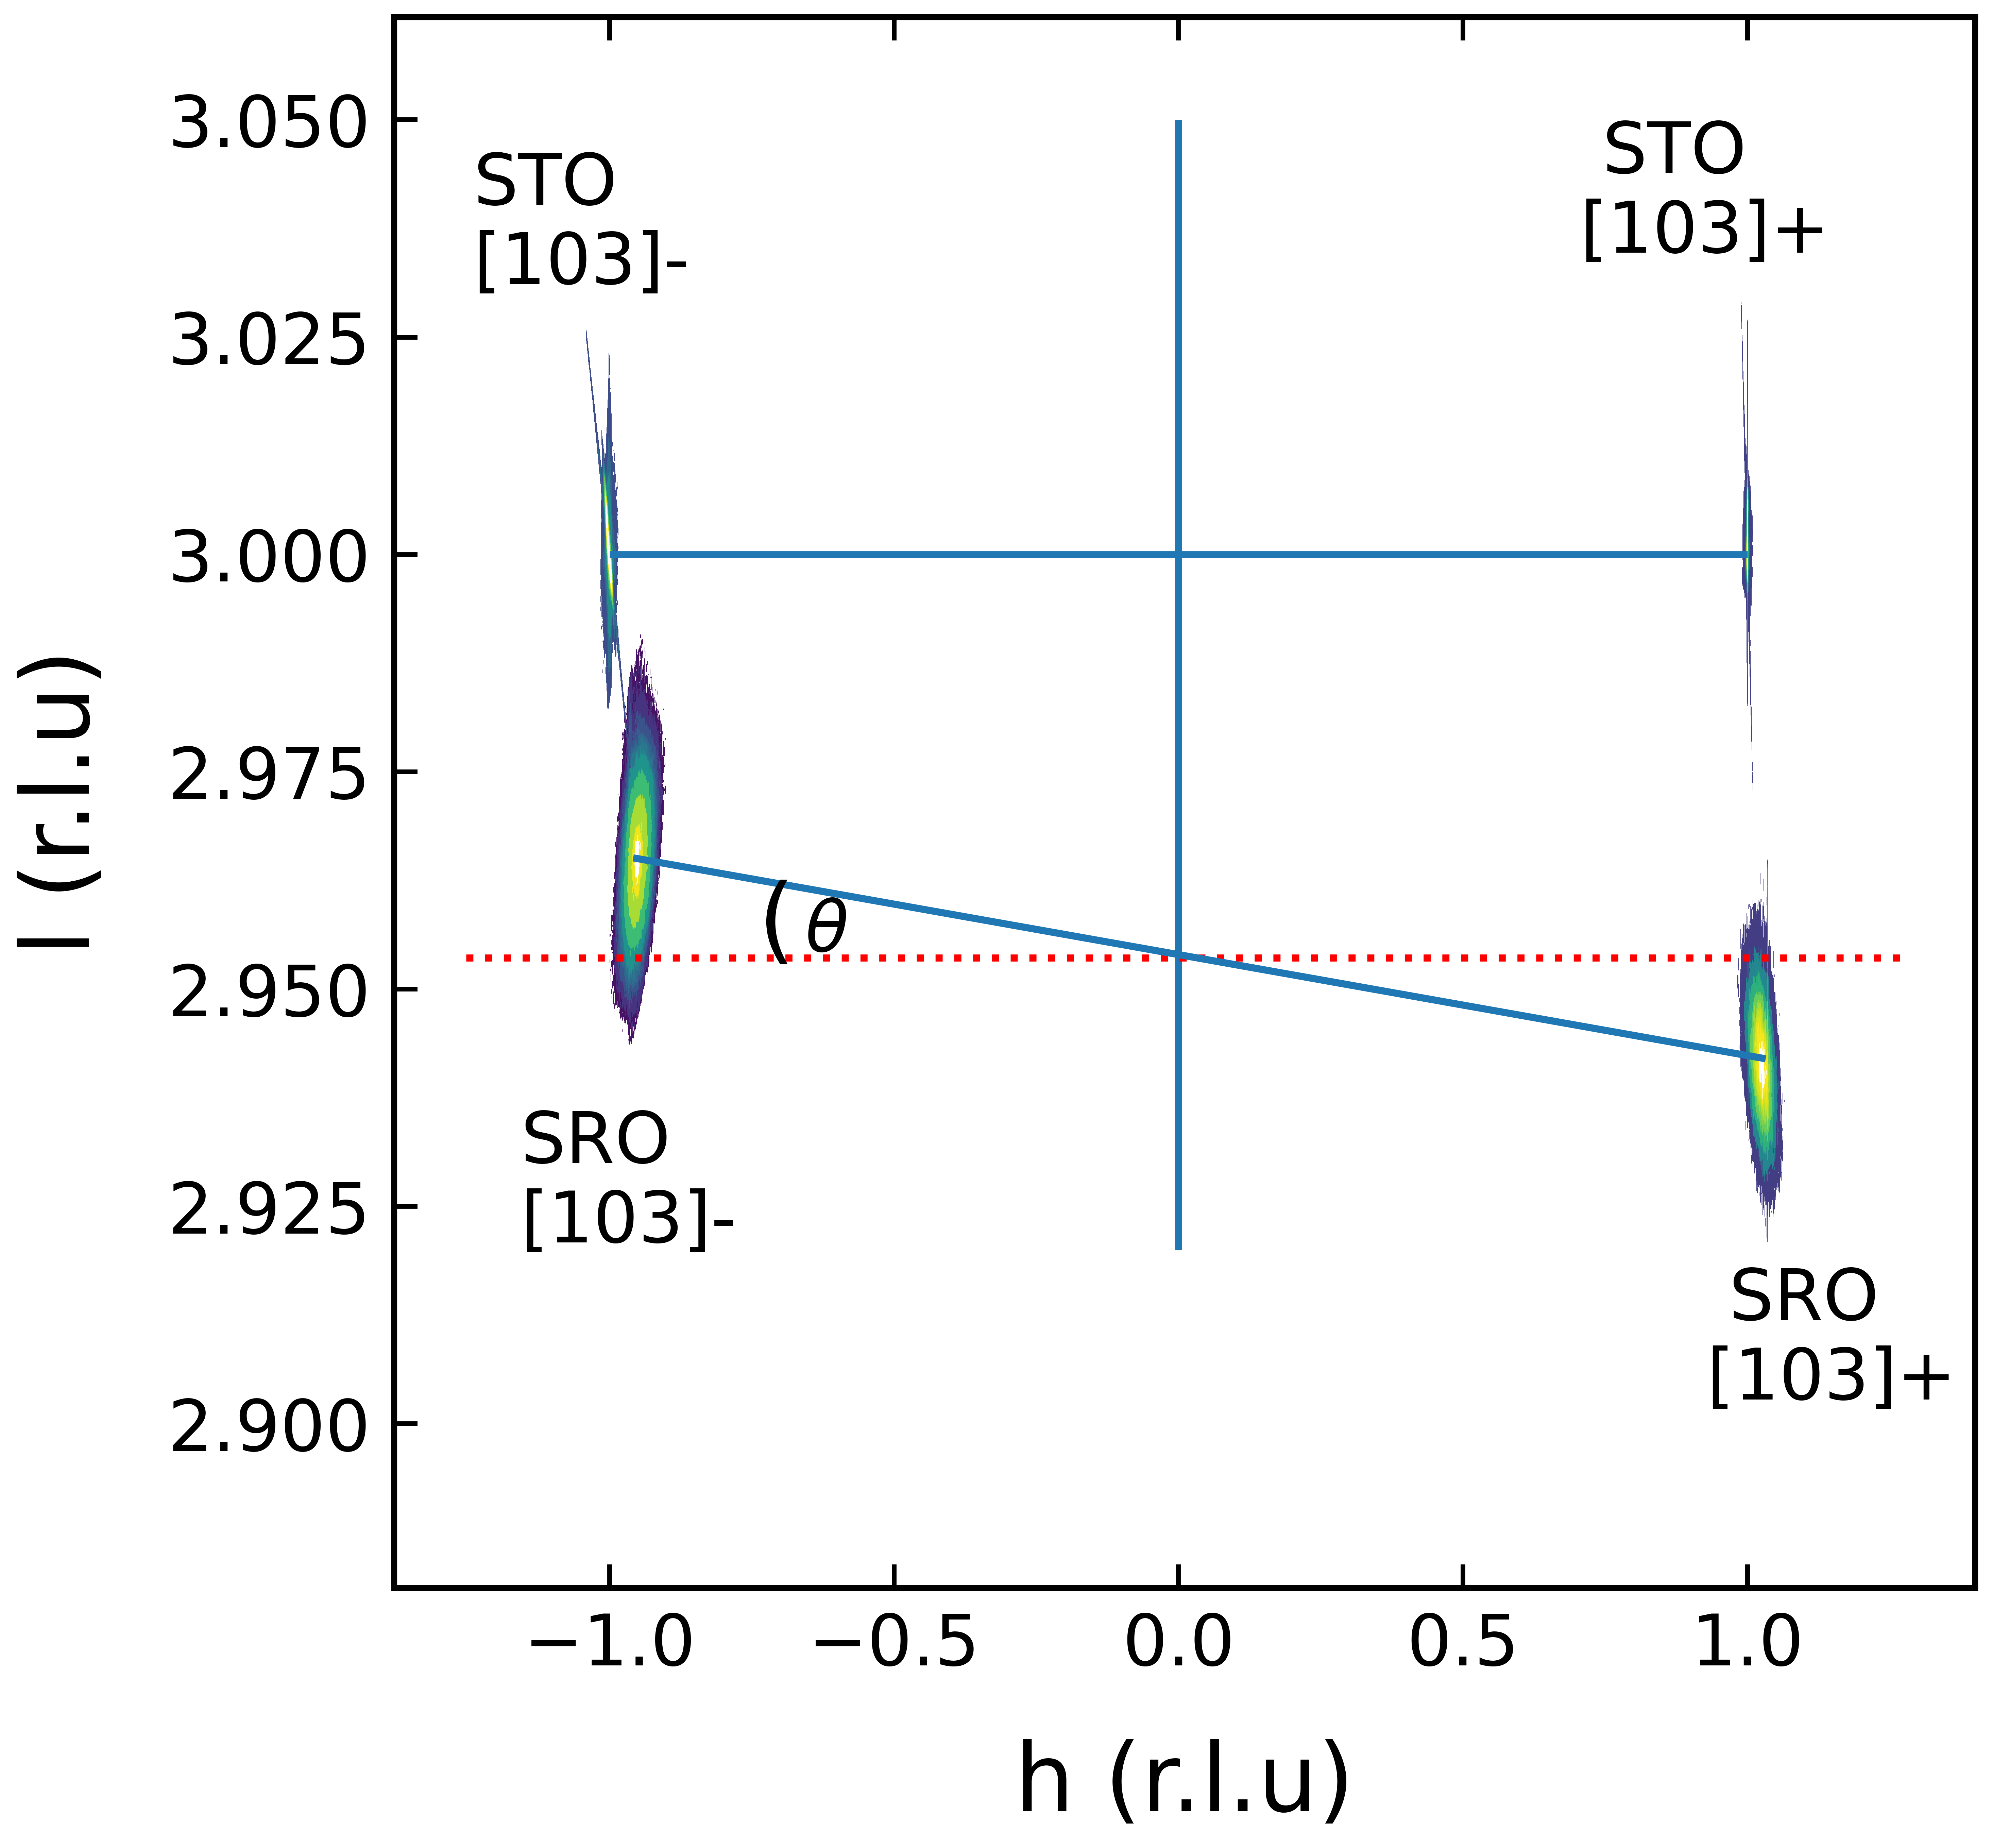

In [19]:
fig,ax = plt.subplots(figsize=(12, 12), dpi = 500)
#ax2 = ax1.twinx()

ax.tick_params(axis = 'x', which='major', labelsize=30, length = 10, width = 2, direction = 'in', pad = 10, top = True)
ax.tick_params(axis = 'y', which='major', labelsize=30, length = 10, width = 2, direction = 'in', pad = 10, right = False)
ax.tick_params(axis = 'y', which='major', labelsize=30, length = 10, width = 2, direction = 'in', pad = 10, right = False)

ax.spines["top"].set_linewidth(2.5)
ax.spines["bottom"].set_linewidth(2.5)
ax.spines["right"].set_linewidth(2.5)
ax.spines["left"].set_linewidth(2.5)





ax.contourf(xi_NNO_plus,yi_NNO_plus,zi_NNO_plus, levels = [5,10,15,20,25,28,30,33,35],cmap = 'viridis',norm = matplotlib.colors.LogNorm(vmin = 5,vmax = 35),linewidths = 1, alpha = 1)
ax.contourf(xi_STO_plus,yi_STO_plus,zi_STO_plus, levels = [10,50,100,500,1000,5000,10000,12000,13200,14000,14200,14400],norm = matplotlib.colors.LogNorm(vmin = 5, vmax = 14400),cmap = 'viridis',linewidths = 1, alpha = 1)
ax.contourf(xi_NNO_minus,yi_NNO_minus,zi_NNO_minus, levels = [12,15,20,25,28,30,33,35,50,80,120,135],cmap = 'viridis',norm = matplotlib.colors.LogNorm(vmin = 12,vmax = 135),linewidths = 1, alpha = 1)
ax.contourf(xi_STO_minus,yi_STO_minus,zi_STO_minus, levels = [20,50,100,500,1000,5000,10000,12000,13200,14000,14200,14400],norm = matplotlib.colors.LogNorm(vmin = 5, vmax = 14400),cmap = 'viridis',linewidths = 1, alpha = 1)
ax.vlines(0,2.92,3.05, lw = 3)
ax.hlines(3,-1,1, lw = 3)
ax.hlines(2.9536,x_max_index_NNO_minus-0.3,x_max_index_NNO_plus-0.052+0.3, color = 'red',linestyle = 'dotted', lw = 3)

x_maxes_NNO = [x_max_index_NNO_minus,x_max_index_NNO_plus]
x_maxes_STO = [x_max_index_minus,x_max_index_minus]
y_maxes_NNO = [y_max_index_NNO_minus,y_max_index_NNO_plus]
y_maxes_STO = [y_max_index_minus,y_max_index_minus]

print(x_maxes_NNO,'x_maxes_NNO')
print(x_maxes_STO,'x_maxes_STO')
print(y_maxes_NNO,'y_maxes_NNO')
print(y_maxes_STO,'y_maxes_STO')


ax.plot(x_maxes_NNO,y_maxes_NNO, lw = 3)


a, b, = np.polynomial.polynomial.polyfit(x_maxes_NNO,y_maxes_NNO, 1)
print('a',a)
print('b',b)
fit = a + b*x_maxes_NNO[0] + b*x_maxes_NNO[1]
print('Polynomial Fit 1st Order', np.polynomial.polynomial.Polynomial([a,b]))


######## Left Triangle ##########
    
left_edge_length = y_max_index_NNO_minus - a
bottom_edge_length = -x_max_index_NNO_minus - 0
hypo = np.sqrt(bottom_edge_length**2 + left_edge_length**2)
    
print('left_edge_length',left_edge_length)
print('bottom_edge_length',bottom_edge_length)

print('hypo',hypo)

ratios = left_edge_length/bottom_edge_length

print('ratios', ratios)

angle = np.arctan(ratios)#*(180/np.pi) (Python trig functions use rads! Will keep it as rads as the rotation formula does)

print('angle',angle)

rotation_matrix_minus = [[np.cos(angle),-np.sin(angle)],[np.sin(angle),np.cos(angle)]]


vector_minus = [[x_maxes_NNO[0]],[y_maxes_NNO[0]]]

print('rotation_matrix_minus',rotation_matrix_minus)
print('vector_minus',vector_minus)


#x_max_NNO_minus_rotated

#SRO_a_parameter_left = ((1+(1-hypo))*3.905) 

#print('SRO_a_parameter_left',SRO_a_parameter_left)

#x_max_NNO_minus_rotated = np.cos(angle)*-hypo

vector_NNO_minus_rotated = np.matmul(rotation_matrix_minus,vector_minus)

print('vector_NNO_minus_rotated',vector_NNO_minus_rotated)

#SRO_a_parameter_left = ((1+(1+x_max_NNO_minus_rotated))*3.905) 

#print('SRO_a_parameter_left',SRO_a_parameter_left)

######### Right Triangle ################

right_edge_length = y_max_index_NNO_plus - a
right_bottom_edge_length = x_max_index_NNO_plus - 0
hypo_right = np.sqrt(right_bottom_edge_length**2 + right_edge_length**2)
    
print('right_edge_length',left_edge_length)
print('right_bottom_edge_length',right_bottom_edge_length)

print('hypo_right',hypo_right)

ratios_right = left_edge_length/bottom_edge_length

print('ratios_right', ratios_right)

angle_right = np.tan(ratios_right)#*(180/np.pi)

print('angle_right',angle_right)


#SRO_a_parameter_left = ((1+(1-hypo))*3.905) 

#print('SRO_a_parameter_left',SRO_a_parameter_left)

rotation_matrix_plus = [[np.cos(angle),-np.sin(angle)],[np.sin(angle),np.cos(angle)]]


vector_plus = [[x_maxes_NNO[1]],[y_maxes_NNO[1]]]

print('rotation_matrix_plus',rotation_matrix_plus)
print('vector_plus',vector_plus)

vector_NNO_plus_rotated = np.matmul(rotation_matrix_plus,vector_plus)

#x_max_NNO_plus_rotated = np.cos(angle_right)*hypo_right

print('vector_NNO_plus_rotated',vector_NNO_plus_rotated)

#SRO_a_parameter_right = ((1+(1+x_max_NNO_plus_rotated))*3.905) 

#print('SRO_a_parameter_right',SRO_a_parameter_right)

#SRO_a_lattice_parameter =  (SRO_a_parameter_left + SRO_a_parameter_right)/2



############ 

total_length = -vector_NNO_minus_rotated[0] + vector_NNO_plus_rotated[0]

#print('total_length',total_length)

#oo2_SRO_x_position = total_length/2

#print('oo2_SRO_x_position',oo2_SRO_x_position)

#correction = 1-oo2_SRO_x_position

#print('correction',correction)

#SRO_a_lattice_parameter_left = (1+(x_max_NNO_minus_rotated  + oo2_SRO_x_position - correction))*3.905

#print('SRO_a_lattice_parameter_left',SRO_a_lattice_parameter_left)

#SRO_a_lattice_parameter_right = (1+(x_max_NNO_plus_rotated - correction - oo2_SRO_x_position - correction))*3.905

#print('SRO_a_lattice_parameter_right',SRO_a_lattice_parameter_right)

#SRO_a_lattice_parameter = (SRO_a_lattice_parameter_left + SRO_a_lattice_parameter_right)/2

#print('SRO_a_lattice_parameter',SRO_a_lattice_parameter)


##########



test = (1+(2-total_length)/2) * 3.905

print('test',test)

test2 = ((3+(3-2.953))/3)*3.905

print('test2',test2)

text = ax.text(0.05,0.83, 'STO\n[103]-', size=30, color = 'black',transform = ax.transAxes )
text = ax.text(0.08,0.22, 'SRO\n[103]-', size=30, color = 'black',transform = ax.transAxes )

text = ax.text(0.75,0.85, ' STO\n[103]+', size=30, color = 'black',transform = ax.transAxes )
text = ax.text(0.83,0.12, ' SRO\n[103]+', size=30, color = 'black',transform = ax.transAxes )

text = ax.text(0.26,0.405, r'$\theta$', size=30, color = 'black',transform = ax.transAxes )
text = ax.text(0.23,0.405, r'(', size=40, color = 'black',transform = ax.transAxes )

ax.set_ylabel(r'l (r.l.u)',fontsize=40,labelpad = 25)
ax.set_xlabel(r'h (r.l.u)',fontsize=40,labelpad = 25) 

#plt.savefig(r"C:\Users\pblah\Data\XRD\FM332\Figures\Both_RSM_hkl.png", bbox_inches = "tight")
#plt.savefig(r"C:\Users\pblah\Data\XRD\FM332\Figures\Both_RSM_hkl.pdf", bbox_inches = "tight", format = "pdf")


### Breaking x axis ##

C:\Users\pblah\AppData\Local\Temp\ipykernel_4448\3960664250.py:26: UserWarning: Log scale: values of z <= 0 have been masked
  ax1.contourf(xi_NNO_plus,yi_NNO_plus,zi_NNO_plus, levels = [5,10,15,20,25,28,30,33,35],cmap = 'viridis',norm = matplotlib.colors.LogNorm(vmin = 5,vmax = 35),linewidths = 1, alpha = 1)
C:\Users\pblah\AppData\Local\Temp\ipykernel_4448\3960664250.py:26: UserWarning: linewidths is ignored by contourf
  ax1.contourf(xi_NNO_plus,yi_NNO_plus,zi_NNO_plus, levels = [5,10,15,20,25,28,30,33,35],cmap = 'viridis',norm = matplotlib.colors.LogNorm(vmin = 5,vmax = 35),linewidths = 1, alpha = 1)
C:\Users\pblah\AppData\Local\Temp\ipykernel_4448\3960664250.py:27: UserWarning: Log scale: values of z <= 0 have been masked
  ax1.contourf(xi_STO_plus,yi_STO_plus,zi_STO_plus, levels = [10,50,100,500,1000,5000,10000,12000,13200,14000,14200,14400],norm = matplotlib.colors.LogNorm(vmin = 5, vmax = 14400),cmap = 'viridis',linewidths = 1, alpha = 1)
C:\Users\pblah\AppData\Local\Temp\ipyker

[-0.9525853177257526, 1.0259274284548496] x_maxes_NNO
[-1.0014844147157191, -1.0014844147157191] x_maxes_STO
[2.9650307023411373, 2.942056794936455] y_maxes_NNO
[3.0, 3.0] y_maxes_STO
a 2.953969562135325
b -0.011611705534387786
Polynomial Fit 1st Order 2.95396956 - 0.01161171 x
left_edge_length 0.011061140205812503
bottom_edge_length 0.9525853177257526
hypo 0.9526495349126696
ratios 0.011611705534387612
angle 0.01161222743788862
x_max_NNO_minus_rotated -0.9525853061803163
right_edge_length 0.011061140205812503
right_bottom_edge_length 1.0259274284548496
hypo_right 1.025996589896046
ratios_right 0.011611705534387612
angle_right 0.01161222743788862
x_max_NNO_plus_rotated 1.0259274160204992
total_length 1.9785127222008154
0.9892563611004077
correction 0.01074363889959229
SRO_a_lattice_parameter_left 3.9642926496571405
SRO_a_lattice_parameter_right 3.9642926496571413
SRO_a_lattice_parameter 3.964292649657141
3.9889078198058154
3.966178333333333


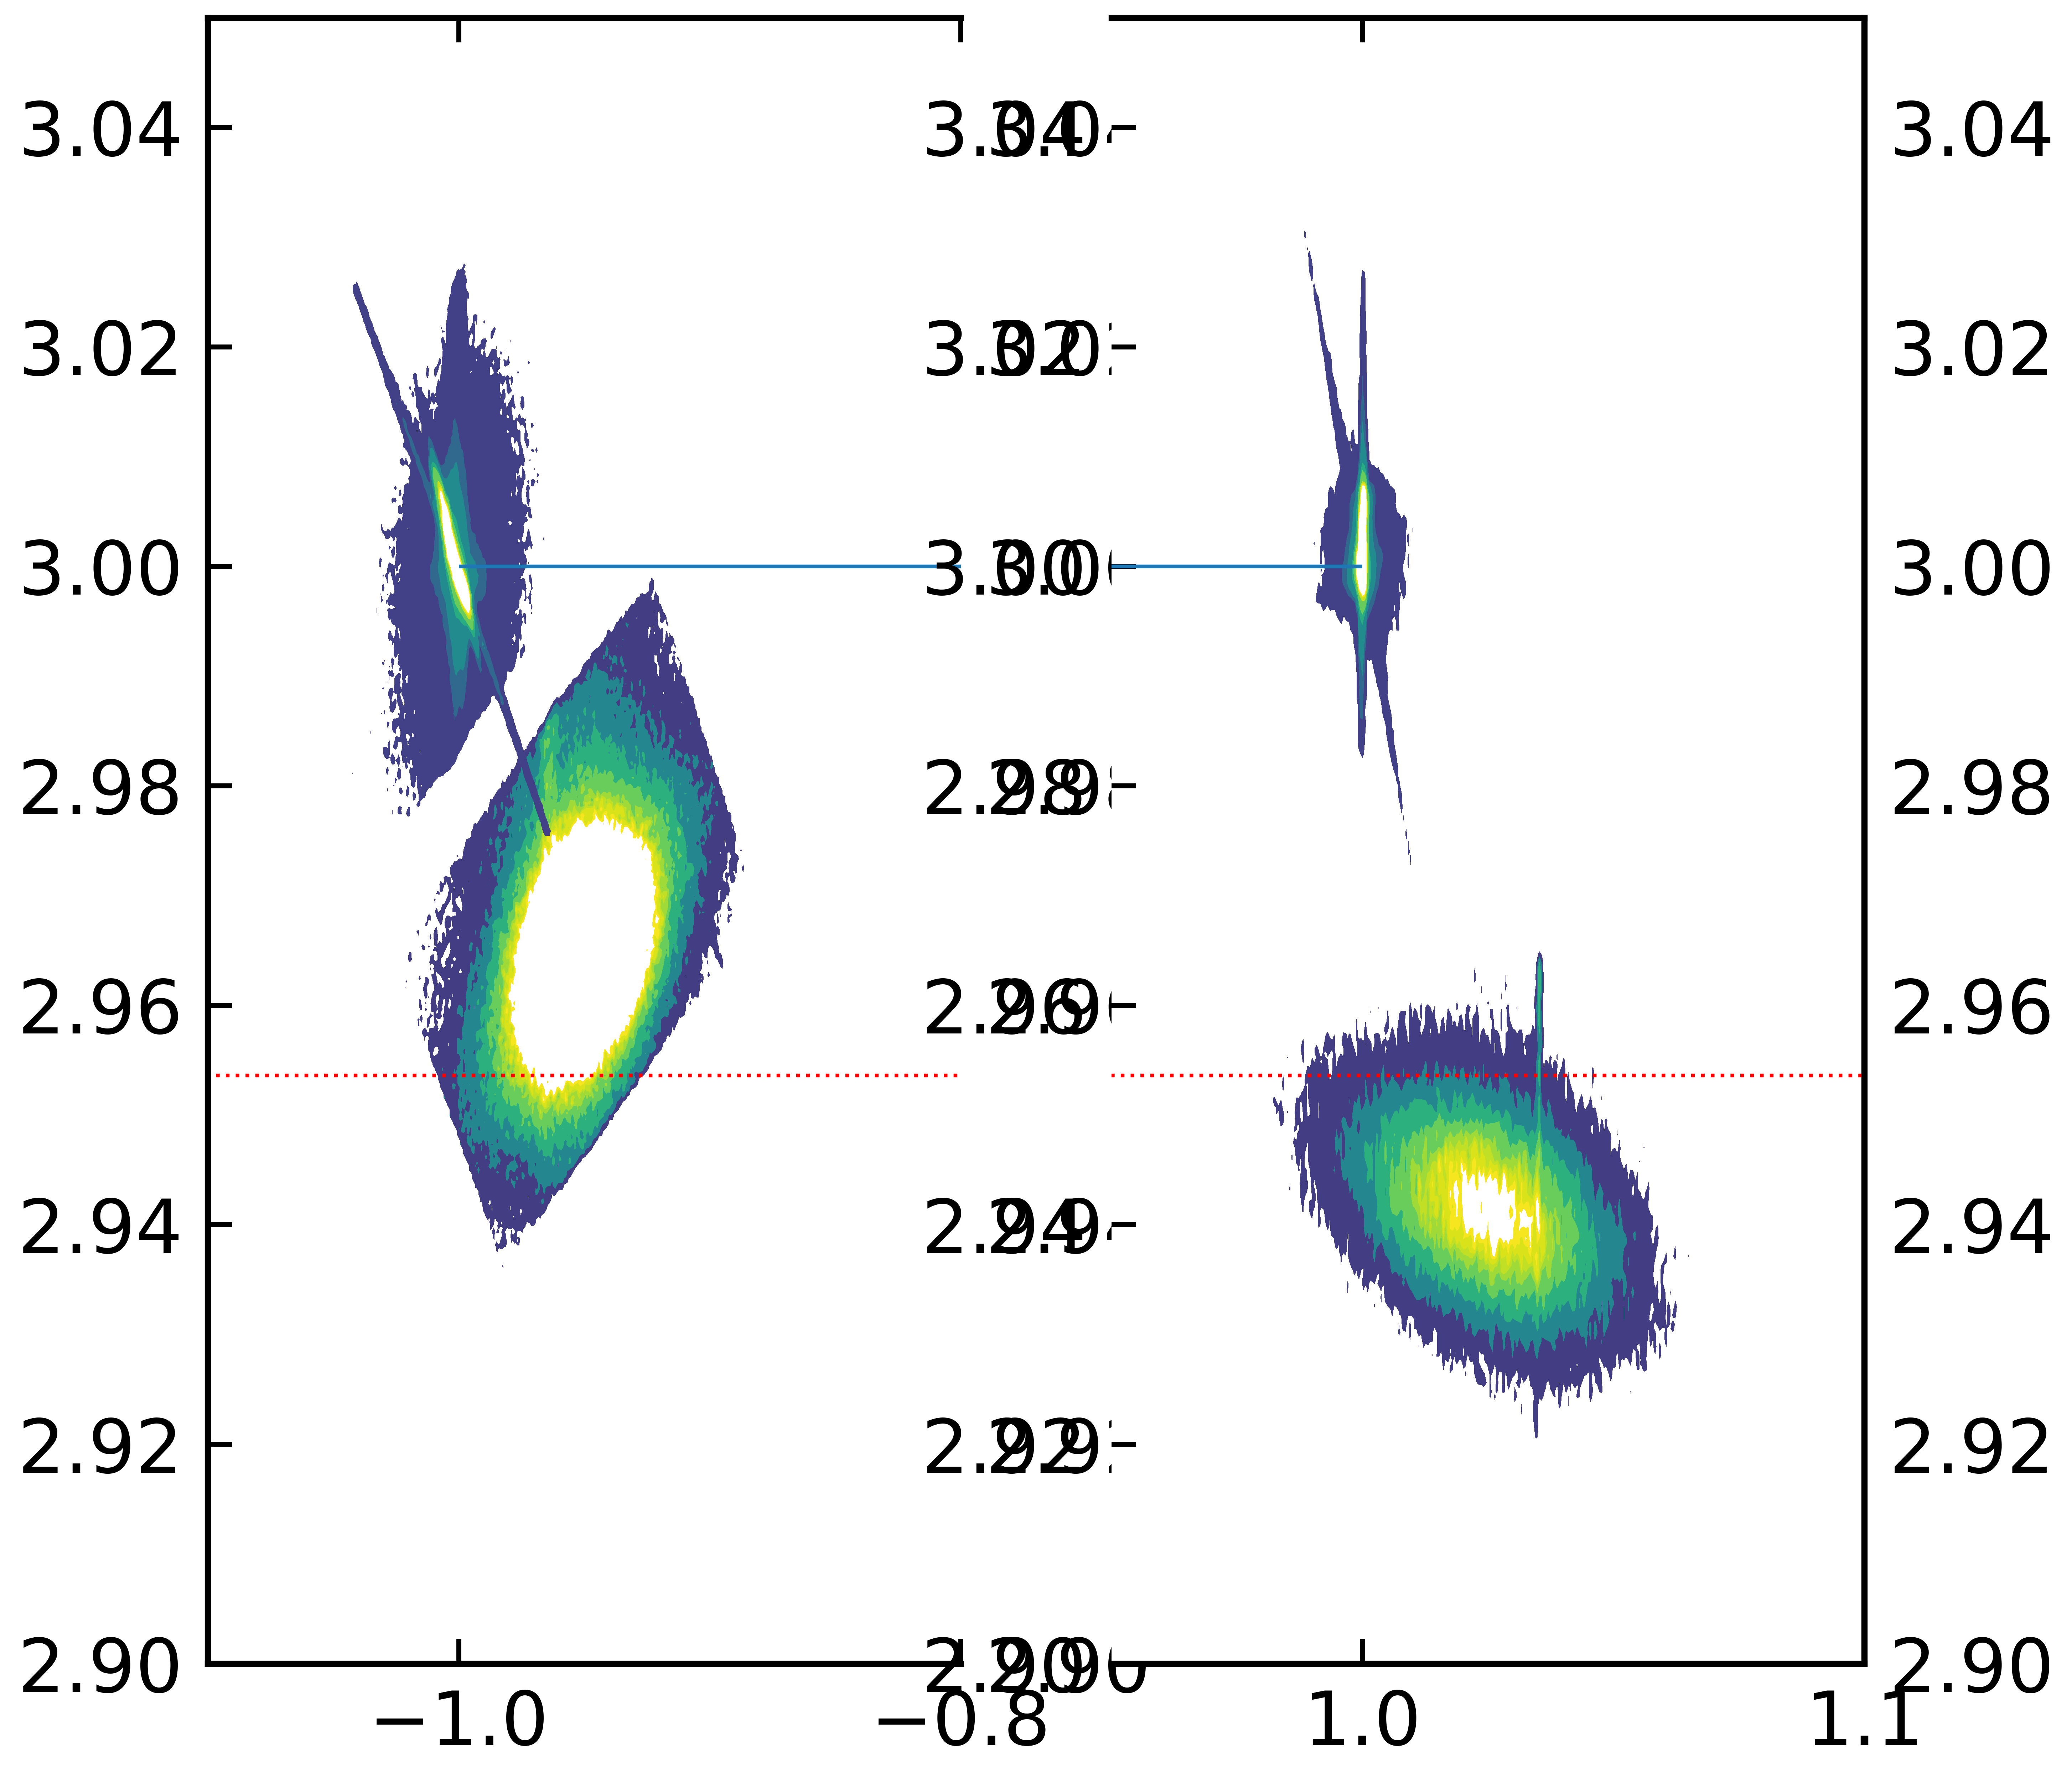

In [181]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12, 12), dpi = 500)
#ax2 = ax1.twinx()

ax1.tick_params(axis = 'x', which='major', labelsize=30, length = 10, width = 2, direction = 'in', pad = 10, top = True)
ax1.tick_params(axis = 'y', which='major', labelsize=30, length = 10, width = 2, direction = 'in', pad = 10, right = False)
ax1.tick_params(axis = 'y', which='major', labelsize=30, length = 10, width = 2, direction = 'in', pad = 10, right = False)

ax1.spines["top"].set_linewidth(2.5)
ax1.spines["bottom"].set_linewidth(2.5)
ax1.spines["right"].set_linewidth(2.5)
ax1.spines["left"].set_linewidth(2.5)

ax2.tick_params(axis = 'x', which='major', labelsize=30, length = 10, width = 2, direction = 'in', pad = 10, top = True)
ax2.tick_params(axis = 'y', which='major', labelsize=30, length = 10, width = 2, direction = 'in', pad = 10, right = False)
ax2.tick_params(axis = 'y', which='major', labelsize=30, length = 10, width = 2, direction = 'in', pad = 10, right = False)

ax2.spines["top"].set_linewidth(2.5)
ax2.spines["bottom"].set_linewidth(2.5)
ax2.spines["right"].set_linewidth(2.5)
ax2.spines["left"].set_linewidth(2.5)





ax1.contourf(xi_NNO_plus,yi_NNO_plus,zi_NNO_plus, levels = [5,10,15,20,25,28,30,33,35],cmap = 'viridis',norm = matplotlib.colors.LogNorm(vmin = 5,vmax = 35),linewidths = 1, alpha = 1)
ax1.contourf(xi_STO_plus,yi_STO_plus,zi_STO_plus, levels = [10,50,100,500,1000,5000,10000,12000,13200,14000,14200,14400],norm = matplotlib.colors.LogNorm(vmin = 5, vmax = 14400),cmap = 'viridis',linewidths = 1, alpha = 1)
ax1.contourf(xi_NNO_minus,yi_NNO_minus,zi_NNO_minus, levels = [5,10,15,20,25,28,30,33,35],cmap = 'viridis',norm = matplotlib.colors.LogNorm(vmin = 5,vmax = 35),linewidths = 1, alpha = 1)
ax1.contourf(xi_STO_minus,yi_STO_minus,zi_STO_minus, levels = [10,50,100,500,1000,5000,10000,12000,13200,14000,14200,14400],norm = matplotlib.colors.LogNorm(vmin = 5, vmax = 14400),cmap = 'viridis',linewidths = 1, alpha = 1)
ax1.vlines(0,2.92,3.05)
ax1.hlines(3,-1,1)
ax1.hlines(2.9536,x_max_index_NNO_minus-0.3,x_max_index_NNO_plus-0.052+0.3, color = 'red',linestyle = 'dotted')


ax1.set_ylim(2.9, 3.05)
ax1.set_xlim(-1.1, -0.8)


ax2.contourf(xi_NNO_plus,yi_NNO_plus,zi_NNO_plus, levels = [5,10,15,20,25,28,30,33,35],cmap = 'viridis',norm = matplotlib.colors.LogNorm(vmin = 5,vmax = 35),linewidths = 1, alpha = 1)
ax2.contourf(xi_STO_plus,yi_STO_plus,zi_STO_plus, levels = [10,50,100,500,1000,5000,10000,12000,13200,14000,14200,14400],norm = matplotlib.colors.LogNorm(vmin = 5, vmax = 14400),cmap = 'viridis',linewidths = 1, alpha = 1)
ax2.contourf(xi_NNO_minus,yi_NNO_minus,zi_NNO_minus, levels = [5,10,15,20,25,28,30,33,35],cmap = 'viridis',norm = matplotlib.colors.LogNorm(vmin = 5,vmax = 35),linewidths = 1, alpha = 1)
ax2.contourf(xi_STO_minus,yi_STO_minus,zi_STO_minus, levels = [10,50,100,500,1000,5000,10000,12000,13200,14000,14200,14400],norm = matplotlib.colors.LogNorm(vmin = 5, vmax = 14400),cmap = 'viridis',linewidths = 1, alpha = 1)
ax2.vlines(0,2.92,3.05)
ax2.hlines(3,-1,1)
ax2.hlines(2.9536,x_max_index_NNO_minus-0.3,x_max_index_NNO_plus-0.052+0.3, color = 'red',linestyle = 'dotted')

ax2.set_ylim(2.9, 3.05)
ax2.set_xlim(0.95, 1.1)

ax1.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
#ax1.yaxis.tick_left()
ax1.tick_params(labelright='off')
#ax2.yaxis.tick_right()
ax2.tick_params(labelright='off')
ax2.tick_params(labelleft='off')






x_maxes_NNO = [x_max_index_NNO_minus,x_max_index_NNO_plus]
x_maxes_STO = [x_max_index_minus,x_max_index_minus]
y_maxes_NNO = [y_max_index_NNO_minus,y_max_index_NNO_plus]
y_maxes_STO = [y_max_index_minus,y_max_index_minus]

print(x_maxes_NNO,'x_maxes_NNO')
print(x_maxes_STO,'x_maxes_STO')
print(y_maxes_NNO,'y_maxes_NNO')
print(y_maxes_STO,'y_maxes_STO')

ax.plot(x_maxes_NNO,y_maxes_NNO)


a, b, = np.polynomial.polynomial.polyfit(x_maxes_NNO,y_maxes_NNO, 1)
print('a',a)
print('b',b)
fit = a + b*x_maxes_NNO[0] + b*x_maxes_NNO[1]
print('Polynomial Fit 1st Order', np.polynomial.polynomial.Polynomial([a,b]))


######## Left Triangle ##########
    
left_edge_length = y_max_index_NNO_minus - a
bottom_edge_length = -x_max_index_NNO_minus - 0
hypo = np.sqrt(bottom_edge_length**2 + left_edge_length**2)
    
print('left_edge_length',left_edge_length)
print('bottom_edge_length',bottom_edge_length)

print('hypo',hypo)

ratios = left_edge_length/bottom_edge_length

print('ratios', ratios)

angle = np.tan(ratios)#*(180/np.pi)

print('angle',angle)


#SRO_a_parameter_left = ((1+(1-hypo))*3.905) 

#print('SRO_a_parameter_left',SRO_a_parameter_left)

x_max_NNO_minus_rotated = np.cos(angle)*-hypo

print('x_max_NNO_minus_rotated',x_max_NNO_minus_rotated)

#SRO_a_parameter_left = ((1+(1+x_max_NNO_minus_rotated))*3.905) 

#print('SRO_a_parameter_left',SRO_a_parameter_left)

######### Right Triangle ################

right_edge_length = y_max_index_NNO_plus - a
right_bottom_edge_length = x_max_index_NNO_plus - 0
hypo_right = np.sqrt(right_bottom_edge_length**2 + right_edge_length**2)
    
print('right_edge_length',left_edge_length)
print('right_bottom_edge_length',right_bottom_edge_length)

print('hypo_right',hypo_right)

ratios_right = left_edge_length/bottom_edge_length

print('ratios_right', ratios_right)

angle_right = np.tan(ratios_right)#*(180/np.pi)

print('angle_right',angle_right)


#SRO_a_parameter_left = ((1+(1-hypo))*3.905) 

#print('SRO_a_parameter_left',SRO_a_parameter_left)

x_max_NNO_plus_rotated = np.cos(angle_right)*hypo_right

print('x_max_NNO_plus_rotated',x_max_NNO_plus_rotated)

#SRO_a_parameter_right = ((1+(1+x_max_NNO_plus_rotated))*3.905) 

#print('SRO_a_parameter_right',SRO_a_parameter_right)

#SRO_a_lattice_parameter =  (SRO_a_parameter_left + SRO_a_parameter_right)/2



############ 

total_length = -x_max_NNO_minus_rotated + x_max_NNO_plus_rotated

print('total_length',total_length)

oo2_SRO_x_position = total_length/2

print(oo2_SRO_x_position)

correction = 1-oo2_SRO_x_position

print('correction',correction)

SRO_a_lattice_parameter_left = (1+(x_max_NNO_minus_rotated - correction + oo2_SRO_x_position - correction))*3.905

print('SRO_a_lattice_parameter_left',SRO_a_lattice_parameter_left)

SRO_a_lattice_parameter_right = (1+(x_max_NNO_plus_rotated - correction - oo2_SRO_x_position - correction))*3.905

print('SRO_a_lattice_parameter_right',SRO_a_lattice_parameter_right)

SRO_a_lattice_parameter = (SRO_a_lattice_parameter_left + SRO_a_lattice_parameter_right)/2

print('SRO_a_lattice_parameter',SRO_a_lattice_parameter)


##########



test = (1+(2-total_length)) * 3.905

print(test)

test2 = ((3+(3-2.953))/3)*3.905

print(test2)



















    





